


<p style="font-size:36px;text-align:center"> <b>Personalized Gene-based cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h3> Description</h2>

<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>



##### <p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>

<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>




<h3>Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h3>Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h3>Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [144]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")


from sklearn.datasets import *
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
#from imblearn.over_sampling import SMOTE

In [5]:
!unzip training_text.zip

Archive:  training_text.zip
replace training_text? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [6]:
!unzip training_variants.zip

Archive:  training_variants.zip
replace training_variants? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [8]:
data = pd.read_csv("training_variants")
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [9]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

<h3>3.1.3. Preprocessing of text</h3>

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a622378/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [12]:
#text processing stage.
start_time = time.process_time()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.process_time() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 25.513436 seconds


In [13]:
%%time
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text, on='ID', how='left')
result.head()

CPU times: user 4.63 ms, sys: 2.8 ms, total: 7.43 ms
Wall time: 12.2 ms


ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [14]:
result.loc[result.isnull().any(axis=1),:]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [15]:
#replacing the text that is null to combination of gene and variation value
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>


In [16]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')


In [17]:

# split the data into test and train by maintaining same distribution of output variable 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [145]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

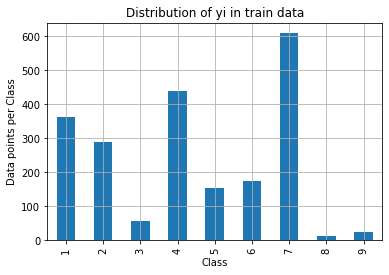

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


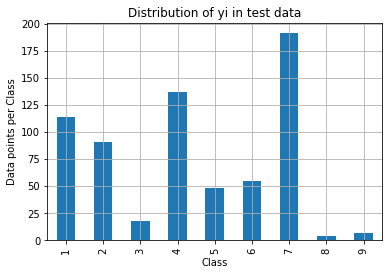

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


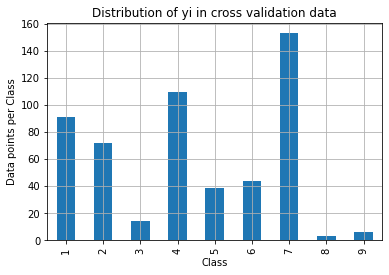

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [20]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

#print(train_class_distribution)
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')       
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [21]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1,  2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4907904515388566
Log loss on Test Data using Random Model 2.520500572158858
-------------------- Confusion matrix --------------------


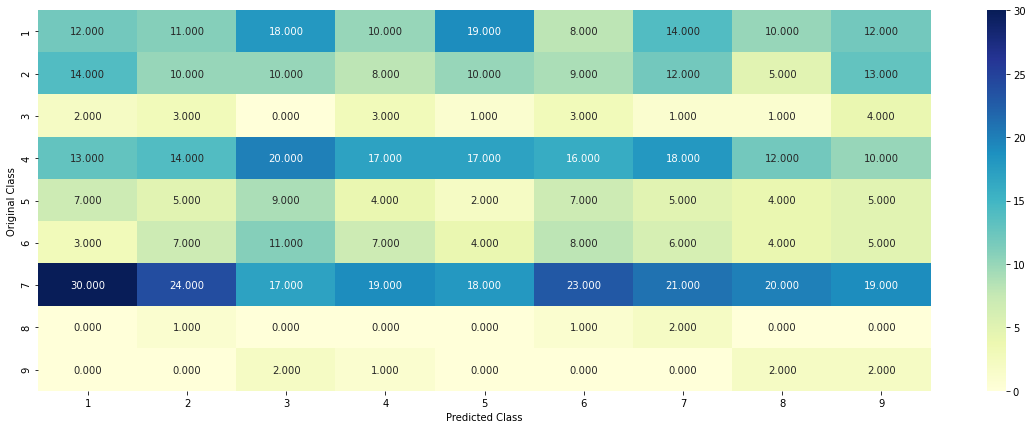

-------------------- Precision matrix (Columm Sum=1) --------------------


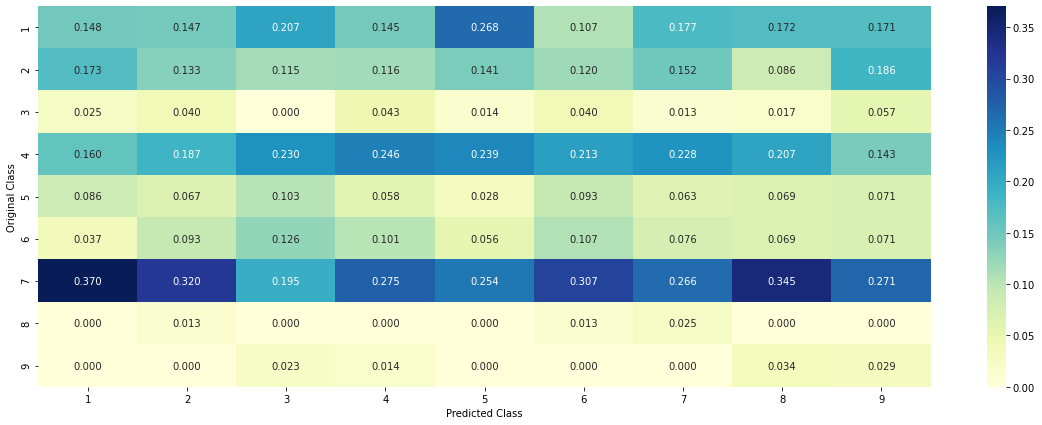

-------------------- Recall matrix (Row sum=1) --------------------


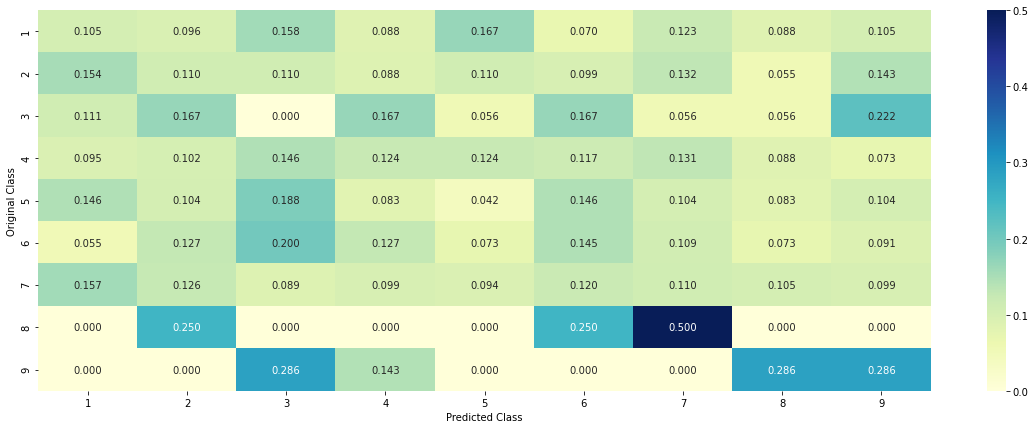

In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [28]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element 
# = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> How many categories are there and How they are distributed?</p>

In [23]:
unique_genes = train_df['Gene'].value_counts()
print(type(unique_genes))
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

<class 'pandas.core.series.Series'>
Number of Unique Genes : 236
BRCA1     162
TP53      110
EGFR       88
PTEN       85
BRCA2      79
KIT        57
ALK        52
BRAF       49
ERBB2      45
PIK3CA     42
Name: Gene, dtype: int64


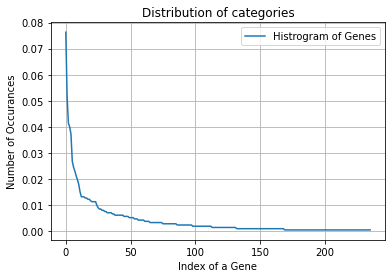

In [167]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.title("Distribution of categories")
plt.grid()
plt.show()


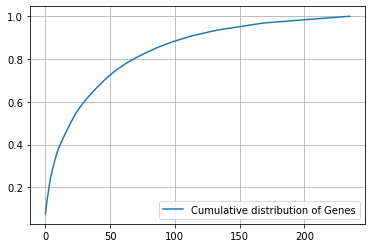

In [26]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> Featurize the Gene feature</p>

<p style="font-size:16px;">We can featurize this variable in 2 ways
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [168]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [169]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [170]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 418
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2124 non-null   int64 
 1   Gene       2124 non-null   object
 2   Variation  2124 non-null   object
 3   Class      2124 non-null   int64 
 4   TEXT       2124 non-null   object
dtypes: int64(2), object(3)
memory usage: 99.6+ KB


In [34]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'asxl1',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxp1',
 'fubp1',
 'gata3',
 'gnaq',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf1

In [35]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 235)


<p style="font-size:18px;"> How good is this gene feature in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. 
In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.159230469102026
For values of alpha =  0.0001 The log loss is: 1.1211980649763091
For values of alpha =  0.001 The log loss is: 1.1593325642602619
For values of alpha =  0.01 The log loss is: 1.271606288886684
For values of alpha =  0.1 The log loss is: 1.385882663588676
For values of alpha =  1 The log loss is: 1.4350983613882538


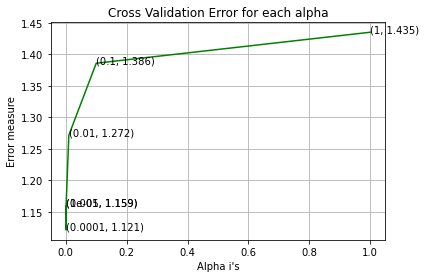

For values of best alpha =  0.0001 The train log loss is: 0.9922335823597936
For values of best alpha =  0.0001 The cross validation log loss is: 1.1211980649763091
For values of best alpha =  0.0001 The test log loss is: 1.2310030967660313


In [36]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [38]:
print("How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

How many data points in Test and CV datasets are covered by the  236  genes in train dataset?
Ans
1. In test data 642 out of 665 : 96.54135338345866
2. In cross validation data 519 out of  532 : 97.55639097744361


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

In [39]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1912
Truncating_Mutations    58
Deletion                54
Amplification           52
Fusions                 24
G12V                     4
Overexpression           3
Q61H                     3
E17K                     3
Y64A                     2
F384L                    2
Name: Variation, dtype: int64


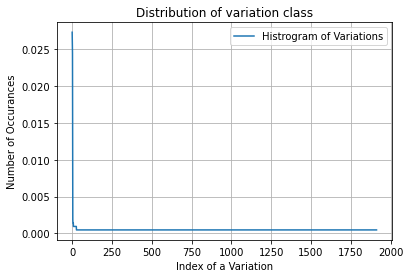

In [171]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.title("Distribution of variation class")
plt.legend()
plt.grid()
plt.show()

[0.02919021 0.05131827 0.07344633 ... 0.99905838 0.99952919 1.        ]


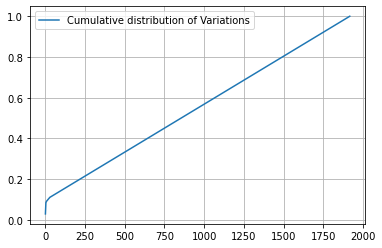

In [33]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

How to featurize this Variation feature ?</p>

<p style="font-size:14px;">There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [66]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [67]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [68]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [69]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1946)


<p style="font-size:16px;"> How good is this Variation feature  in predicting y_i?</p>
Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.724450351981353
For values of alpha =  0.0001 The log loss is: 1.7113680905317792
For values of alpha =  0.001 The log loss is: 1.7159322245469228
For values of alpha =  0.01 The log loss is: 1.723696037140224
For values of alpha =  0.1 The log loss is: 1.7358047801133205
For values of alpha =  1 The log loss is: 1.7377194160025309


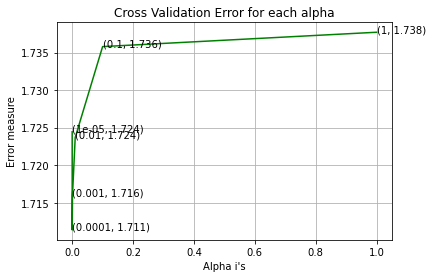

For values of best alpha =  0.0001 The train log loss is: 0.6251613199075209
For values of best alpha =  0.0001 The cross validation log loss is: 1.7113680905317792
For values of best alpha =  0.0001 The test log loss is: 1.7102141081152222


In [70]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:16px;"> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> Not sure! But lets be very sure using the below analysis. </p>

In [71]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1912  genes in test and cross validation data sets?
Ans
1. In test data 66 out of 665 : 9.924812030075188
2. In cross validation data 41 out of  532 : 7.7067669172932325


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [72]:
# cls_text is a data frame
# for every row in data frame consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [73]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [74]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52775


In [75]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [76]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [77]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [78]:
# Normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [79]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [80]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 4722, 4: 3828, 6: 3044, 5: 2731, 7: 2142, 8: 2134, 10: 1489, 12: 1476, 9: 1438, 11: 1115, 16: 959, 13: 941, 14: 940, 15: 733, 17: 625, 18: 612, 24: 569, 20: 557, 21: 469, 19: 425, 22: 411, 25: 407, 26: 383, 31: 376, 23: 376, 28: 373, 32: 334, 30: 331, 48: 323, 43: 323, 27: 318, 33: 287, 36: 283, 29: 265, 35: 263, 34: 242, 42: 234, 39: 221, 40: 204, 37: 199, 45: 182, 49: 173, 41: 170, 38: 170, 56: 164, 50: 160, 44: 157, 60: 155, 46: 153, 54: 152, 47: 152, 58: 145, 53: 144, 52: 143, 51: 137, 68: 123, 55: 122, 62: 118, 72: 117, 63: 115, 57: 114, 64: 107, 59: 107, 61: 104, 69: 103, 70: 100, 65: 100, 90: 96, 66: 92, 96: 91, 91: 90, 85: 87, 67: 87, 73: 86, 79: 83, 77: 83, 76: 81, 78: 80, 88: 75, 71: 75, 89: 73, 87: 72, 93: 71, 81: 71, 74: 71, 100: 70, 75: 69, 82: 67, 83: 65, 80: 65, 92: 63, 86: 63, 84: 59, 99: 58, 95: 55, 104: 54, 135: 53, 109: 53, 103: 52, 110: 51, 112: 50, 108: 50, 98: 50, 117: 49, 102: 49, 101: 49, 144: 48, 126: 48, 94: 48, 121: 47, 114: 47, 120: 46, 113: 46, 

For values of alpha =  1e-05 The log loss is: 1.2635784931472276
For values of alpha =  0.0001 The log loss is: 1.088834160307451
For values of alpha =  0.001 The log loss is: 1.0675114674862407
For values of alpha =  0.01 The log loss is: 1.1726166886197766
For values of alpha =  0.1 The log loss is: 1.424074910216952
For values of alpha =  1 The log loss is: 1.6434106495467924


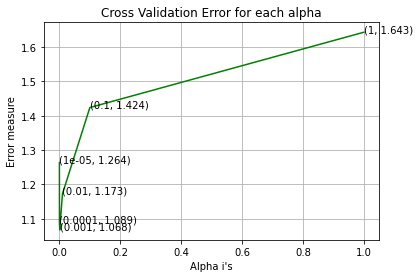

For values of best alpha =  0.001 The train log loss is: 0.6550841044306424
For values of best alpha =  0.001 The cross validation log loss is: 1.0675114674862407
For values of best alpha =  0.001 The test log loss is: 1.2043364551687212


In [81]:
# Train a Logistic regression+Calibration model using text features which are on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:16px;"> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> Yes, it seems like! </p>

In [82]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [83]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.172 % of word of test data appeared in train data
95.222 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [85]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [86]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [87]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [88]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [89]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54956)
(number of data points * number of features) in test data =  (665, 54956)
(number of data points * number of features) in cross validation data = (532, 54956)


In [90]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.2149293428908365
for alpha = 0.0001
Log Loss : 1.21204472683571
for alpha = 0.001
Log Loss : 1.205026420357199
for alpha = 0.1
Log Loss : 1.2064176635206714
for alpha = 1
Log Loss : 1.2350974704998252
for alpha = 10
Log Loss : 1.345312688647573
for alpha = 100
Log Loss : 1.3744006956171664
for alpha = 1000
Log Loss : 1.308525368241137


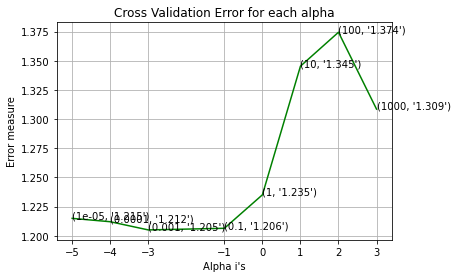

For values of best alpha =  0.001 The train log loss is: 0.8256096257609978
For values of best alpha =  0.001 The cross validation log loss is: 1.205026420357199
For values of best alpha =  0.001 The test log loss is: 1.2846059904179319


In [91]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.205026420357199
Number of missclassified point : 0.37406015037593987
-------------------- Confusion matrix --------------------


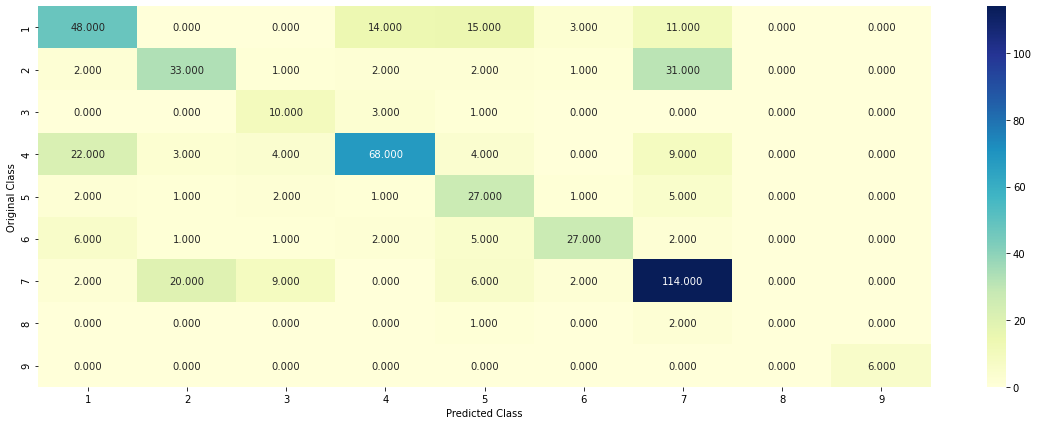

-------------------- Precision matrix (Columm Sum=1) --------------------


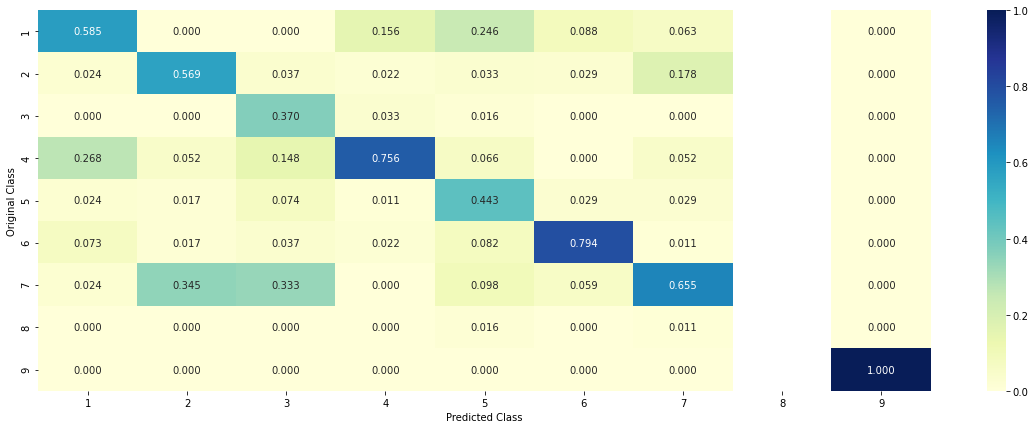

-------------------- Recall matrix (Row sum=1) --------------------


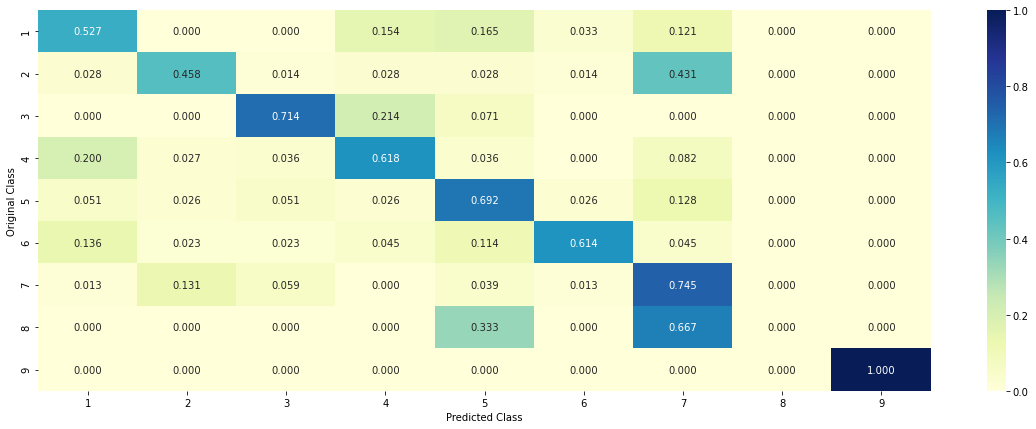

In [92]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [94]:
test_point_index = 100
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0939 0.1711 0.0114 0.1075 0.0372 0.0438 0.5235 0.0061 0.0056]]
Actual Class : 7
--------------------------------------------------
Out of the top  1000  features  0 are present in query point


In [95]:
test_df['TEXT'].iloc[test_point_index]

'noonan syndrome ns characterized short stature characteristic facial features heart defects recently missense mutations ptpn11 gene encoding protein tyrosine phosphatase ptp shp 2 identified patients ns somatic mutations ptpn11 detected childhood leukemia recent studies showed phosphatase activities five mutations identified ns juvenile myelomonocytic leukemia jmml increased however functional properties mutations remain unidentified study order clarify differences mutations identified ns leukemia examined phosphatase activity 14 mutants shp 2 identified nine mutations including novel f71i mutation 16 41 ns patients two mutations including novel g503v mutation three 29 patients leukemia immune complex phosphatase assays individual mutants transfected cos7 cells showed ten mutants identified ns four mutants leukemia showed 1 4 fold 12 7 fold increased activation compared wild type shp 2 results suggest pathogenesis ns leukemia associated enhanced phosphatase activity mutant shp 2 compa

In [98]:
test_df['Gene'].iloc[test_point_index]

'PTPN11'

In [99]:
test_df['Variation'].iloc[test_point_index]

'T73I'

In [100]:
clf.coef_.shape

(9, 54956)

In [101]:
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
indices[0]

array([27477, 17918, 42946,  9604, 42945, 42941, 42940, 42938, 42937,
       42936, 42935, 42934, 31155, 17917, 42929, 42927,  9617, 17916,
       42921, 42919,  9622, 31156,  9624,  9625,  9626, 42930, 42918,
       31147, 42952, 42979, 17930, 42966, 42965, 42964,  9579,  9580,
       42962, 31142,  9583,  9584,  9599, 31143, 17924, 31145,  9589,
       42958,  9591, 42957,  9593, 31146,  9595, 42954, 42953, 42959,
       42980, 31158,  9630, 17888, 42899, 42898, 31196,  9663, 17886,
        9665, 31197, 42895, 17883, 42894, 31195, 42893, 31198, 42892,
       42891, 42890, 42889, 31199, 42879, 42878, 31200, 31207, 42875,
        9671, 17907, 31188, 42903, 17905, 42914, 31171,  9634,  9635,
       31174,  9637, 42913,  9639,  9640,  9641, 42902,  9642, 42907,
        9645,  9646,  9647,  9648, 42906, 17894,  9651, 17892, 42905,
       42904, 42911,  9683, 42982, 42984, 43086, 31081, 31082, 31083,
       43076, 31085,  9496, 31086, 43070, 43069, 31088, 43093, 31089,
        9503, 31095,

In [103]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [105]:
for i in range(10):
  test_point_index = i
  no_feature = 100
  predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
  print("Predicted Class :", predicted_cls[0])
  print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
  print("Actual Class :", test_y[test_point_index])
  indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:]
  print("-"*50)
  get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0896 0.186  0.0112 0.104  0.0363 0.0425 0.5192 0.0058 0.0054]]
Actual Class : 7
--------------------------------------------------
16353 Text feature [d2o] present in test data point [True]
17702 Text feature [k379e] present in test data point [True]
19362 Text feature [ovaries] present in test data point [True]
20462 Text feature [hotspots] present in test data point [True]
20651 Text feature [pten] present in test data point [True]
22807 Text feature [pkc] present in test data point [True]
23568 Text feature [phosphopeptide] present in test data point [True]
24122 Text feature [movements] present in test data point [True]
24949 Text feature [n564d] present in test data point [True]
25554 Text feature [scaffolding] present in test data point [True]
25827 Text feature [motions] present in test data point [True]
26391 Text feature [weakens] present in test data point [True]
28202 Text feature [irs1] present in test data point [True]

50502 Text feature [catalytic] present in test data point [True]
50504 Text feature [percent] present in test data point [True]
50676 Text feature [c2] present in test data point [True]
50687 Text feature [82] present in test data point [True]
50800 Text feature [128] present in test data point [True]
50809 Text feature [colorectal] present in test data point [True]
50888 Text feature [principle] present in test data point [True]
50918 Text feature [spatially] present in test data point [True]
50928 Text feature [s6b] present in test data point [True]
50976 Text feature [enzyme] present in test data point [True]
51015 Text feature [orientation] present in test data point [True]
51134 Text feature [s6a] present in test data point [True]
51236 Text feature [digested] present in test data point [True]
51259 Text feature [pi3ks] present in test data point [True]
51303 Text feature [diverse] present in test data point [True]
51321 Text feature [synergize] present in test data point [True]
5

53188 Text feature [increasingly] present in test data point [True]
53189 Text feature [comparing] present in test data point [True]
53195 Text feature [facilitate] present in test data point [True]
53202 Text feature [disruption] present in test data point [True]
53214 Text feature [ways] present in test data point [True]
53228 Text feature [quantified] present in test data point [True]
53229 Text feature [membranes] present in test data point [True]
53236 Text feature [network] present in test data point [True]
53240 Text feature [tightly] present in test data point [True]
53282 Text feature [interact] present in test data point [True]
53287 Text feature [combined] present in test data point [True]
53303 Text feature [allows] present in test data point [True]
53313 Text feature [crystal] present in test data point [True]
53322 Text feature [goal] present in test data point [True]
53330 Text feature [scale] present in test data point [True]
53358 Text feature [apparent] present in tes

54240 Text feature [conformation] present in test data point [True]
54242 Text feature [among] present in test data point [True]
54244 Text feature [stimulated] present in test data point [True]
54246 Text feature [association] present in test data point [True]
54255 Text feature [wt] present in test data point [True]
54260 Text feature [especially] present in test data point [True]
54261 Text feature [near] present in test data point [True]
54267 Text feature [site] present in test data point [True]
54275 Text feature [responsible] present in test data point [True]
54281 Text feature [19] present in test data point [True]
54287 Text feature [protein] present in test data point [True]
54288 Text feature [except] present in test data point [True]
54290 Text feature [resistant] present in test data point [True]
54293 Text feature [allowing] present in test data point [True]
54296 Text feature [surprising] present in test data point [True]
54298 Text feature [frequent] present in test dat

54689 Text feature [tumors] present in test data point [True]
54691 Text feature [fold] present in test data point [True]
54692 Text feature [cancer] present in test data point [True]
54693 Text feature [18] present in test data point [True]
54695 Text feature [cancers] present in test data point [True]
54696 Text feature [activate] present in test data point [True]
54698 Text feature [four] present in test data point [True]
54700 Text feature [27] present in test data point [True]
54701 Text feature [first] present in test data point [True]
54702 Text feature [analyzed] present in test data point [True]
54704 Text feature [survival] present in test data point [True]
54705 Text feature [role] present in test data point [True]
54706 Text feature [even] present in test data point [True]
54708 Text feature [therefore] present in test data point [True]
54710 Text feature [enhance] present in test data point [True]
54711 Text feature [would] present in test data point [True]
54716 Text feat

54929 Text feature [contrast] present in test data point [True]
54930 Text feature [also] present in test data point [True]
54933 Text feature [well] present in test data point [True]
54935 Text feature [downstream] present in test data point [True]
54936 Text feature [kinase] present in test data point [True]
54937 Text feature [activating] present in test data point [True]
54938 Text feature [presence] present in test data point [True]
Out of the top  100  features  663 are present in query point
Predicted Class : 1
Predicted Class Probabilities: [[0.5813 0.0919 0.0119 0.1109 0.0383 0.0451 0.1088 0.0061 0.0057]]
Actual Class : 1
--------------------------------------------------
7106 Text feature [finnzymes] present in test data point [True]
12672 Text feature [mulv] present in test data point [True]
18293 Text feature [asses] present in test data point [True]
19891 Text feature [chromoplexy] present in test data point [True]
22129 Text feature [pdx] present in test data point [True]

35387 Text feature [nodal] present in test data point [True]
35396 Text feature [gastrointestinal] present in test data point [True]
35459 Text feature [000251] present in test data point [True]
35508 Text feature [leukocytes] present in test data point [True]
35525 Text feature [seldom] present in test data point [True]
35541 Text feature [quarters] present in test data point [True]
35554 Text feature [improvement] present in test data point [True]
35623 Text feature [md] present in test data point [True]
35629 Text feature [turin] present in test data point [True]
35833 Text feature [677] present in test data point [True]
35857 Text feature [tacstd1] present in test data point [True]
35918 Text feature [inheriting] present in test data point [True]
36069 Text feature [avant] present in test data point [True]
36079 Text feature [microwave] present in test data point [True]
36098 Text feature [utah] present in test data point [True]
36148 Text feature [segment] present in test data poi

41905 Text feature [429] present in test data point [True]
41907 Text feature [010] present in test data point [True]
41936 Text feature [342] present in test data point [True]
42097 Text feature [abbreviations] present in test data point [True]
42100 Text feature [tgfbr2] present in test data point [True]
42108 Text feature [oncogene] present in test data point [True]
42116 Text feature [amplifying] present in test data point [True]
42145 Text feature [contig] present in test data point [True]
42153 Text feature [questionable] present in test data point [True]
42208 Text feature [1386] present in test data point [True]
42305 Text feature [geographical] present in test data point [True]
42359 Text feature [609309] present in test data point [True]
42407 Text feature [favorable] present in test data point [True]
42511 Text feature [histology] present in test data point [True]
42513 Text feature [34a] present in test data point [True]
42549 Text feature [1273] present in test data point 

46186 Text feature [programme] present in test data point [True]
46189 Text feature [noting] present in test data point [True]
46190 Text feature [hapmap] present in test data point [True]
46255 Text feature [g168] present in test data point [True]
46266 Text feature [gmbh] present in test data point [True]
46290 Text feature [metastasis] present in test data point [True]
46303 Text feature [pathologist] present in test data point [True]
46357 Text feature [pwo] present in test data point [True]
46366 Text feature [receptor] present in test data point [True]
46377 Text feature [utrs] present in test data point [True]
46408 Text feature [mlh1] present in test data point [True]
46423 Text feature [refseq] present in test data point [True]
46431 Text feature [precursor] present in test data point [True]
46450 Text feature [biolabs] present in test data point [True]
46463 Text feature [silent] present in test data point [True]
46501 Text feature [neurofibromatosis] present in test data poi

48564 Text feature [pipeline] present in test data point [True]
48565 Text feature [recommended] present in test data point [True]
48582 Text feature [kumar] present in test data point [True]
48589 Text feature [aberrant] present in test data point [True]
48621 Text feature [bax] present in test data point [True]
48640 Text feature [genesis] present in test data point [True]
48641 Text feature [adenomatous] present in test data point [True]
48692 Text feature [1995] present in test data point [True]
48695 Text feature [dinucleotides] present in test data point [True]
48733 Text feature [mmr] present in test data point [True]
48737 Text feature [peaks] present in test data point [True]
48743 Text feature [2010] present in test data point [True]
48744 Text feature [permit] present in test data point [True]
48891 Text feature [se] present in test data point [True]
48899 Text feature [d5s346] present in test data point [True]
48909 Text feature [ethidium] present in test data point [True]


50310 Text feature [successive] present in test data point [True]
50321 Text feature [135] present in test data point [True]
50328 Text feature [excised] present in test data point [True]
50333 Text feature [benign] present in test data point [True]
50357 Text feature [limitations] present in test data point [True]
50361 Text feature [1990] present in test data point [True]
50362 Text feature [106] present in test data point [True]
50363 Text feature [detecting] present in test data point [True]
50373 Text feature [neoplastic] present in test data point [True]
50378 Text feature [originate] present in test data point [True]
50380 Text feature [evaluation] present in test data point [True]
50400 Text feature [ethical] present in test data point [True]
50409 Text feature [period] present in test data point [True]
50415 Text feature [probands] present in test data point [True]
50416 Text feature [198] present in test data point [True]
50428 Text feature [exonuclease] present in test data 

51409 Text feature [patient] present in test data point [True]
51416 Text feature [mother] present in test data point [True]
51417 Text feature [institute] present in test data point [True]
51427 Text feature [phusion] present in test data point [True]
51440 Text feature [prognosis] present in test data point [True]
51458 Text feature [proximal] present in test data point [True]
51463 Text feature [recommendations] present in test data point [True]
51465 Text feature [skipping] present in test data point [True]
51469 Text feature [1i] present in test data point [True]
51471 Text feature [named] present in test data point [True]
51483 Text feature [interactive] present in test data point [True]
51486 Text feature [elevated] present in test data point [True]
51490 Text feature [netherlands] present in test data point [True]
51491 Text feature [screen] present in test data point [True]
51511 Text feature [5g] present in test data point [True]
51513 Text feature [prism] present in test dat

52389 Text feature [discovery] present in test data point [True]
52392 Text feature [term] present in test data point [True]
52396 Text feature [counseling] present in test data point [True]
52406 Text feature [hundreds] present in test data point [True]
52417 Text feature [group] present in test data point [True]
52420 Text feature [donor] present in test data point [True]
52426 Text feature [advantages] present in test data point [True]
52430 Text feature [syndrome] present in test data point [True]
52435 Text feature [counts] present in test data point [True]
52444 Text feature [rarely] present in test data point [True]
52448 Text feature [run] present in test data point [True]
52451 Text feature [review] present in test data point [True]
52460 Text feature [eliminating] present in test data point [True]
52463 Text feature [113] present in test data point [True]
52466 Text feature [accompanying] present in test data point [True]
52481 Text feature [time] present in test data point [

53096 Text feature [alterations] present in test data point [True]
53097 Text feature [monoclonal] present in test data point [True]
53099 Text feature [cloned] present in test data point [True]
53100 Text feature [nuclear] present in test data point [True]
53102 Text feature [discussed] present in test data point [True]
53104 Text feature [differs] present in test data point [True]
53106 Text feature [newly] present in test data point [True]
53116 Text feature [physical] present in test data point [True]
53118 Text feature [promoters] present in test data point [True]
53122 Text feature [requires] present in test data point [True]
53123 Text feature [true] present in test data point [True]
53144 Text feature [hotspot] present in test data point [True]
53149 Text feature [57] present in test data point [True]
53150 Text feature [comprehensive] present in test data point [True]
53151 Text feature [concordance] present in test data point [True]
53159 Text feature [took] present in test d

53632 Text feature [positive] present in test data point [True]
53634 Text feature [consequently] present in test data point [True]
53641 Text feature [double] present in test data point [True]
53642 Text feature [restriction] present in test data point [True]
53643 Text feature [conclusions] present in test data point [True]
53650 Text feature [47] present in test data point [True]
53651 Text feature [knowledge] present in test data point [True]
53654 Text feature [ten] present in test data point [True]
53656 Text feature [ligation] present in test data point [True]
53657 Text feature [unknown] present in test data point [True]
53658 Text feature [75] present in test data point [True]
53664 Text feature [advantage] present in test data point [True]
53665 Text feature [examination] present in test data point [True]
53668 Text feature [mlpa] present in test data point [True]
53672 Text feature [shift] present in test data point [True]
53673 Text feature [intact] present in test data poi

53969 Text feature [developing] present in test data point [True]
53971 Text feature [bp] present in test data point [True]
53972 Text feature [help] present in test data point [True]
53976 Text feature [fundamental] present in test data point [True]
53977 Text feature [facilitated] present in test data point [True]
53981 Text feature [mechanism] present in test data point [True]
53982 Text feature [agarose] present in test data point [True]
53984 Text feature [third] present in test data point [True]
53985 Text feature [familial] present in test data point [True]
53986 Text feature [difference] present in test data point [True]
53987 Text feature [predispose] present in test data point [True]
53989 Text feature [tag] present in test data point [True]
53991 Text feature [substantial] present in test data point [True]
53993 Text feature [require] present in test data point [True]
53997 Text feature [chromosome] present in test data point [True]
53999 Text feature [origin] present in tes

54217 Text feature [genbank] present in test data point [True]
54218 Text feature [confirm] present in test data point [True]
54219 Text feature [spectrum] present in test data point [True]
54222 Text feature [roche] present in test data point [True]
54225 Text feature [share] present in test data point [True]
54226 Text feature [much] present in test data point [True]
54227 Text feature [inactivate] present in test data point [True]
54229 Text feature [allow] present in test data point [True]
54231 Text feature [2000] present in test data point [True]
54232 Text feature [shares] present in test data point [True]
54233 Text feature [gives] present in test data point [True]
54235 Text feature [software] present in test data point [True]
54236 Text feature [comprising] present in test data point [True]
54237 Text feature [internal] present in test data point [True]
54239 Text feature [showing] present in test data point [True]
54240 Text feature [screened] present in test data point [Tru

54456 Text feature [interest] present in test data point [True]
54457 Text feature [encompassing] present in test data point [True]
54458 Text feature [exists] present in test data point [True]
54459 Text feature [excluded] present in test data point [True]
54460 Text feature [formation] present in test data point [True]
54462 Text feature [directed] present in test data point [True]
54463 Text feature [early] present in test data point [True]
54465 Text feature [molecular] present in test data point [True]
54466 Text feature [44] present in test data point [True]
54467 Text feature [causing] present in test data point [True]
54471 Text feature [appear] present in test data point [True]
54472 Text feature [comparison] present in test data point [True]
54474 Text feature [lacking] present in test data point [True]
54479 Text feature [linked] present in test data point [True]
54482 Text feature [presence] present in test data point [True]
54484 Text feature [41] present in test data poin

54670 Text feature [phenotype] present in test data point [True]
54671 Text feature [identical] present in test data point [True]
54673 Text feature [16] present in test data point [True]
54681 Text feature [studies] present in test data point [True]
54682 Text feature [level] present in test data point [True]
54684 Text feature [responsible] present in test data point [True]
54685 Text feature [10] present in test data point [True]
54686 Text feature [mutation] present in test data point [True]
54687 Text feature [end] present in test data point [True]
54689 Text feature [implicated] present in test data point [True]
54690 Text feature [underlying] present in test data point [True]
54691 Text feature [genome] present in test data point [True]
54692 Text feature [frequency] present in test data point [True]
54693 Text feature [finally] present in test data point [True]
54694 Text feature [relative] present in test data point [True]
54695 Text feature [carrying] present in test data poi

54858 Text feature [several] present in test data point [True]
54859 Text feature [majority] present in test data point [True]
54860 Text feature [structural] present in test data point [True]
54861 Text feature [gene] present in test data point [True]
54862 Text feature [change] present in test data point [True]
54863 Text feature [efficiency] present in test data point [True]
54864 Text feature [eight] present in test data point [True]
54865 Text feature [proteins] present in test data point [True]
54866 Text feature [similar] present in test data point [True]
54867 Text feature [genes] present in test data point [True]
54868 Text feature [changes] present in test data point [True]
54871 Text feature [within] present in test data point [True]
54872 Text feature [nonsense] present in test data point [True]
54874 Text feature [also] present in test data point [True]
54875 Text feature [five] present in test data point [True]
54876 Text feature [previous] present in test data point [Tru

31765 Text feature [postoperatively] present in test data point [True]
31967 Text feature [urine] present in test data point [True]
31980 Text feature [tryptase] present in test data point [True]
32000 Text feature [said] present in test data point [True]
32010 Text feature [exemplifies] present in test data point [True]
32198 Text feature [allergy] present in test data point [True]
32406 Text feature [fluos] present in test data point [True]
33528 Text feature [buccal] present in test data point [True]
33535 Text feature [insight] present in test data point [True]
33770 Text feature [trephine] present in test data point [True]
34007 Text feature [swabs] present in test data point [True]
34051 Text feature [sequencher] present in test data point [True]
34148 Text feature [n822y] present in test data point [True]
34170 Text feature [graphic] present in test data point [True]
34196 Text feature [beta] present in test data point [True]
34211 Text feature [manifestation] present in test da

47478 Text feature [unavailable] present in test data point [True]
47545 Text feature [lymphomas] present in test data point [True]
47548 Text feature [digestion] present in test data point [True]
47655 Text feature [symptoms] present in test data point [True]
47675 Text feature [intracranial] present in test data point [True]
47696 Text feature [autosomal] present in test data point [True]
47723 Text feature [resembled] present in test data point [True]
47735 Text feature [admitted] present in test data point [True]
47745 Text feature [acetate] present in test data point [True]
47775 Text feature [dasatinib] present in test data point [True]
47827 Text feature [deviation] present in test data point [True]
47915 Text feature [gastric] present in test data point [True]
47929 Text feature [mesylate] present in test data point [True]
47961 Text feature [spin] present in test data point [True]
47982 Text feature [diffuse] present in test data point [True]
48113 Text feature [ser235] presen

51460 Text feature [subtype] present in test data point [True]
51469 Text feature [adenosine] present in test data point [True]
51473 Text feature [graph] present in test data point [True]
51504 Text feature [artifacts] present in test data point [True]
51516 Text feature [back] present in test data point [True]
51526 Text feature [145] present in test data point [True]
51534 Text feature [fields] present in test data point [True]
51541 Text feature [abdomen] present in test data point [True]
51544 Text feature [dako] present in test data point [True]
51607 Text feature [controls] present in test data point [True]
51613 Text feature [49] present in test data point [True]
51624 Text feature [platelet] present in test data point [True]
51633 Text feature [ser473] present in test data point [True]
51658 Text feature [phenol] present in test data point [True]
51666 Text feature [family] present in test data point [True]
51693 Text feature [syndrome] present in test data point [True]
51714 

52935 Text feature [melanoma] present in test data point [True]
52950 Text feature [cycle] present in test data point [True]
52953 Text feature [literature] present in test data point [True]
52955 Text feature [procedure] present in test data point [True]
52969 Text feature [loop] present in test data point [True]
52977 Text feature [usa] present in test data point [True]
52978 Text feature [thr202] present in test data point [True]
52987 Text feature [structure] present in test data point [True]
52988 Text feature [construct] present in test data point [True]
52989 Text feature [ny] present in test data point [True]
52991 Text feature [extremely] present in test data point [True]
52995 Text feature [exclude] present in test data point [True]
53005 Text feature [metastases] present in test data point [True]
53006 Text feature [foster] present in test data point [True]
53013 Text feature [il] present in test data point [True]
53022 Text feature [cytometry] present in test data point [Tr

53634 Text feature [alterations] present in test data point [True]
53635 Text feature [mutational] present in test data point [True]
53637 Text feature [sequence] present in test data point [True]
53640 Text feature [general] present in test data point [True]
53641 Text feature [involvement] present in test data point [True]
53643 Text feature [lesion] present in test data point [True]
53645 Text feature [genes] present in test data point [True]
53646 Text feature [alteration] present in test data point [True]
53665 Text feature [www] present in test data point [True]
53682 Text feature [liver] present in test data point [True]
53684 Text feature [dulbecco] present in test data point [True]
53691 Text feature [pretreatment] present in test data point [True]
53695 Text feature [authors] present in test data point [True]
53702 Text feature [sequences] present in test data point [True]
53707 Text feature [life] present in test data point [True]
53719 Text feature [staining] present in tes

54133 Text feature [promising] present in test data point [True]
54135 Text feature [affect] present in test data point [True]
54140 Text feature [minimal] present in test data point [True]
54142 Text feature [smaller] present in test data point [True]
54151 Text feature [lysis] present in test data point [True]
54152 Text feature [status] present in test data point [True]
54156 Text feature [latter] present in test data point [True]
54159 Text feature [like] present in test data point [True]
54161 Text feature [methods] present in test data point [True]
54164 Text feature [resistance] present in test data point [True]
54167 Text feature [stained] present in test data point [True]
54171 Text feature [presented] present in test data point [True]
54172 Text feature [second] present in test data point [True]
54184 Text feature [intracellular] present in test data point [True]
54186 Text feature [ii] present in test data point [True]
54187 Text feature [rarely] present in test data point [

54474 Text feature [form] present in test data point [True]
54475 Text feature [drugs] present in test data point [True]
54477 Text feature [since] present in test data point [True]
54479 Text feature [selective] present in test data point [True]
54480 Text feature [advanced] present in test data point [True]
54487 Text feature [32] present in test data point [True]
54490 Text feature [known] present in test data point [True]
54494 Text feature [patients] present in test data point [True]
54496 Text feature [alone] present in test data point [True]
54501 Text feature [samples] present in test data point [True]
54506 Text feature [case] present in test data point [True]
54509 Text feature [entire] present in test data point [True]
54511 Text feature [biotechnology] present in test data point [True]
54512 Text feature [needed] present in test data point [True]
54514 Text feature [date] present in test data point [True]
54515 Text feature [type] present in test data point [True]
54517 Tex

54715 Text feature [antibodies] present in test data point [True]
54717 Text feature [tissue] present in test data point [True]
54718 Text feature [target] present in test data point [True]
54719 Text feature [analysis] present in test data point [True]
54721 Text feature [effects] present in test data point [True]
54722 Text feature [later] present in test data point [True]
54723 Text feature [data] present in test data point [True]
54724 Text feature [therapy] present in test data point [True]
54726 Text feature [present] present in test data point [True]
54727 Text feature [subsequent] present in test data point [True]
54728 Text feature [characterized] present in test data point [True]
54729 Text feature [mutant] present in test data point [True]
54730 Text feature [cause] present in test data point [True]
54736 Text feature [tyrosine] present in test data point [True]
54737 Text feature [provided] present in test data point [True]
54738 Text feature [3c] present in test data point

54902 Text feature [due] present in test data point [True]
54904 Text feature [treated] present in test data point [True]
54905 Text feature [compared] present in test data point [True]
54906 Text feature [mutations] present in test data point [True]
54907 Text feature [inhibition] present in test data point [True]
54908 Text feature [described] present in test data point [True]
54910 Text feature [found] present in test data point [True]
54911 Text feature [10] present in test data point [True]
54912 Text feature [showed] present in test data point [True]
54913 Text feature [factor] present in test data point [True]
54914 Text feature [addition] present in test data point [True]
54915 Text feature [may] present in test data point [True]
54916 Text feature [studies] present in test data point [True]
54917 Text feature [similar] present in test data point [True]
54918 Text feature [expressing] present in test data point [True]
54919 Text feature [independent] present in test data point 

14583 Text feature [oxidize] present in test data point [True]
14727 Text feature [hif] present in test data point [True]
15048 Text feature [z0] present in test data point [True]
15082 Text feature [1813] present in test data point [True]
15408 Text feature [commons] present in test data point [True]
16021 Text feature [fe] present in test data point [True]
16202 Text feature [conjugates] present in test data point [True]
16799 Text feature [cullin] present in test data point [True]
17167 Text feature [435] present in test data point [True]
17459 Text feature [cul3] present in test data point [True]
18219 Text feature [1819] present in test data point [True]
18222 Text feature [475] present in test data point [True]
18724 Text feature [lk] present in test data point [True]
18867 Text feature [hn] present in test data point [True]
19526 Text feature [ligases] present in test data point [True]
19568 Text feature [creative] present in test data point [True]
20823 Text feature [roc1] pres

40305 Text feature [transactivation] present in test data point [True]
40416 Text feature [channel] present in test data point [True]
40446 Text feature [titrating] present in test data point [True]
40553 Text feature [spectra] present in test data point [True]
40566 Text feature [variations] present in test data point [True]
40574 Text feature [lifetime] present in test data point [True]
40575 Text feature [capture] present in test data point [True]
40700 Text feature [biphasic] present in test data point [True]
40758 Text feature [complements] present in test data point [True]
40797 Text feature [ka] present in test data point [True]
41331 Text feature [lives] present in test data point [True]
41422 Text feature [segregated] present in test data point [True]
42107 Text feature [emission] present in test data point [True]
42197 Text feature [competitor] present in test data point [True]
42211 Text feature [subunit] present in test data point [True]
42251 Text feature [translationally]

48272 Text feature [44b] present in test data point [True]
48314 Text feature [detailing] present in test data point [True]
48349 Text feature [separation] present in test data point [True]
48381 Text feature [08] present in test data point [True]
48384 Text feature [hyperkeratosis] present in test data point [True]
48398 Text feature [lipids] present in test data point [True]
48407 Text feature [glutamate] present in test data point [True]
48450 Text feature [deviated] present in test data point [True]
48479 Text feature [alleles] present in test data point [True]
48484 Text feature [radical] present in test data point [True]
48501 Text feature [conjugate] present in test data point [True]
48516 Text feature [modifications] present in test data point [True]
48591 Text feature [integrity] present in test data point [True]
48621 Text feature [q75] present in test data point [True]
48639 Text feature [dimer] present in test data point [True]
48675 Text feature [unlabeled] present in test

50221 Text feature [peroxiredoxin1] present in test data point [True]
50223 Text feature [d29] present in test data point [True]
50224 Text feature [l79k] present in test data point [True]
50225 Text feature [w24] present in test data point [True]
50227 Text feature [peroxiredoxins] present in test data point [True]
50228 Text feature [33neh2] present in test data point [True]
50229 Text feature [l30] present in test data point [True]
50230 Text feature [nonstressed] present in test data point [True]
50234 Text feature [fidelity] present in test data point [True]
50260 Text feature [etge] present in test data point [True]
50270 Text feature [chart] present in test data point [True]
50290 Text feature [chemoresistance] present in test data point [True]
50309 Text feature [exporting] present in test data point [True]
50310 Text feature [monophasic] present in test data point [True]
50311 Text feature [evolvement] present in test data point [True]
50313 Text feature [disturb] present in t

51757 Text feature [kd] present in test data point [True]
51760 Text feature [fundamental] present in test data point [True]
51773 Text feature [hemagglutinin] present in test data point [True]
51782 Text feature [carcinogenesis] present in test data point [True]
51785 Text feature [si] present in test data point [True]
51796 Text feature [metabolism] present in test data point [True]
51816 Text feature [amenable] present in test data point [True]
51824 Text feature [effector] present in test data point [True]
51827 Text feature [proper] present in test data point [True]
51843 Text feature [kit] present in test data point [True]
51848 Text feature [implicates] present in test data point [True]
51850 Text feature [relationships] present in test data point [True]
51856 Text feature [pair] present in test data point [True]
51857 Text feature [reactive] present in test data point [True]
51870 Text feature [arising] present in test data point [True]
51873 Text feature [cotransfected] presen

52770 Text feature [sum] present in test data point [True]
52777 Text feature [preferential] present in test data point [True]
52788 Text feature [competition] present in test data point [True]
52792 Text feature [assay] present in test data point [True]
52794 Text feature [tagged] present in test data point [True]
52795 Text feature [squamous] present in test data point [True]
52803 Text feature [arise] present in test data point [True]
52806 Text feature [distribution] present in test data point [True]
52808 Text feature [accumulated] present in test data point [True]
52817 Text feature [strikingly] present in test data point [True]
52819 Text feature [compounds] present in test data point [True]
52830 Text feature [validate] present in test data point [True]
52833 Text feature [vs] present in test data point [True]
52849 Text feature [activities] present in test data point [True]
52850 Text feature [natural] present in test data point [True]
52863 Text feature [hence] present in tes

53378 Text feature [altered] present in test data point [True]
53380 Text feature [simultaneous] present in test data point [True]
53383 Text feature [component] present in test data point [True]
53385 Text feature [representation] present in test data point [True]
53386 Text feature [united] present in test data point [True]
53390 Text feature [post] present in test data point [True]
53391 Text feature [favorable] present in test data point [True]
53394 Text feature [yellow] present in test data point [True]
53395 Text feature [determining] present in test data point [True]
53401 Text feature [responsive] present in test data point [True]
53402 Text feature [code] present in test data point [True]
53407 Text feature [similarities] present in test data point [True]
53418 Text feature [dmso] present in test data point [True]
53419 Text feature [throughout] present in test data point [True]
53422 Text feature [change] present in test data point [True]
53429 Text feature [interactions] pr

53866 Text feature [chose] present in test data point [True]
53869 Text feature [paradigm] present in test data point [True]
53873 Text feature [polyclonal] present in test data point [True]
53875 Text feature [s2] present in test data point [True]
53879 Text feature [hypothesized] present in test data point [True]
53881 Text feature [calbiochem] present in test data point [True]
53883 Text feature [qiagen] present in test data point [True]
53884 Text feature [changes] present in test data point [True]
53889 Text feature [impact] present in test data point [True]
53898 Text feature [location] present in test data point [True]
53900 Text feature [competitive] present in test data point [True]
53903 Text feature [access] present in test data point [True]
53912 Text feature [fluorescent] present in test data point [True]
53914 Text feature [schematic] present in test data point [True]
53921 Text feature [inc] present in test data point [True]
53925 Text feature [polymerase] present in tes

54275 Text feature [responsible] present in test data point [True]
54281 Text feature [19] present in test data point [True]
54283 Text feature [insights] present in test data point [True]
54284 Text feature [materials] present in test data point [True]
54287 Text feature [protein] present in test data point [True]
54289 Text feature [means] present in test data point [True]
54290 Text feature [resistant] present in test data point [True]
54291 Text feature [70] present in test data point [True]
54297 Text feature [genetic] present in test data point [True]
54298 Text feature [frequent] present in test data point [True]
54299 Text feature [statistical] present in test data point [True]
54301 Text feature [evaluate] present in test data point [True]
54303 Text feature [describe] present in test data point [True]
54305 Text feature [published] present in test data point [True]
54307 Text feature [inhibitory] present in test data point [True]
54311 Text feature [decreased] present in test

54522 Text feature [seen] present in test data point [True]
54524 Text feature [36] present in test data point [True]
54525 Text feature [gene] present in test data point [True]
54526 Text feature [80] present in test data point [True]
54528 Text feature [demonstrate] present in test data point [True]
54535 Text feature [strategies] present in test data point [True]
54536 Text feature [pcr] present in test data point [True]
54537 Text feature [university] present in test data point [True]
54538 Text feature [whole] present in test data point [True]
54542 Text feature [limited] present in test data point [True]
54543 Text feature [23] present in test data point [True]
54545 Text feature [possible] present in test data point [True]
54546 Text feature [represents] present in test data point [True]
54547 Text feature [differences] present in test data point [True]
54548 Text feature [summary] present in test data point [True]
54552 Text feature [finally] present in test data point [True]
5

54738 Text feature [3c] present in test data point [True]
54739 Text feature [according] present in test data point [True]
54740 Text feature [represent] present in test data point [True]
54741 Text feature [support] present in test data point [True]
54743 Text feature [provide] present in test data point [True]
54744 Text feature [harboring] present in test data point [True]
54745 Text feature [13] present in test data point [True]
54746 Text feature [strongly] present in test data point [True]
54749 Text feature [highly] present in test data point [True]
54750 Text feature [identification] present in test data point [True]
54751 Text feature [16] present in test data point [True]
54752 Text feature [specific] present in test data point [True]
54753 Text feature [might] present in test data point [True]
54755 Text feature [conditions] present in test data point [True]
54756 Text feature [evaluated] present in test data point [True]
54757 Text feature [drug] present in test data point 

54913 Text feature [factor] present in test data point [True]
54914 Text feature [addition] present in test data point [True]
54915 Text feature [may] present in test data point [True]
54916 Text feature [studies] present in test data point [True]
54917 Text feature [similar] present in test data point [True]
54919 Text feature [independent] present in test data point [True]
54920 Text feature [growth] present in test data point [True]
54922 Text feature [previously] present in test data point [True]
54923 Text feature [suggest] present in test data point [True]
54924 Text feature [however] present in test data point [True]
54925 Text feature [activation] present in test data point [True]
54926 Text feature [potential] present in test data point [True]
54927 Text feature [shown] present in test data point [True]
54928 Text feature [cell] present in test data point [True]
54929 Text feature [contrast] present in test data point [True]
54930 Text feature [also] present in test data point

43879 Text feature [kodak] present in test data point [True]
43889 Text feature [species] present in test data point [True]
43912 Text feature [class] present in test data point [True]
44056 Text feature [chase] present in test data point [True]
44243 Text feature [312] present in test data point [True]
44388 Text feature [aa] present in test data point [True]
44543 Text feature [passages] present in test data point [True]
44544 Text feature [uncover] present in test data point [True]
44614 Text feature [cm2] present in test data point [True]
44700 Text feature [disparity] present in test data point [True]
44707 Text feature [phage] present in test data point [True]
44754 Text feature [eye] present in test data point [True]
44890 Text feature [pancreatic] present in test data point [True]
44967 Text feature [drosophila] present in test data point [True]
44975 Text feature [mutationally] present in test data point [True]
45353 Text feature [uncharacterized] present in test data point [T

51229 Text feature [heart] present in test data point [True]
51236 Text feature [digested] present in test data point [True]
51238 Text feature [143] present in test data point [True]
51251 Text feature [nuclear] present in test data point [True]
51273 Text feature [isolate] present in test data point [True]
51284 Text feature [sizes] present in test data point [True]
51288 Text feature [perform] present in test data point [True]
51303 Text feature [diverse] present in test data point [True]
51335 Text feature [morphologically] present in test data point [True]
51374 Text feature [filter] present in test data point [True]
51381 Text feature [base] present in test data point [True]
51393 Text feature [nras] present in test data point [True]
51403 Text feature [cr] present in test data point [True]
51416 Text feature [rnas] present in test data point [True]
51457 Text feature [dextran] present in test data point [True]
51461 Text feature [fibroblasts] present in test data point [True]
51

52849 Text feature [activities] present in test data point [True]
52855 Text feature [extensive] present in test data point [True]
52862 Text feature [73] present in test data point [True]
52864 Text feature [restriction] present in test data point [True]
52867 Text feature [inserts] present in test data point [True]
52882 Text feature [analogous] present in test data point [True]
52888 Text feature [transcription] present in test data point [True]
52892 Text feature [amount] present in test data point [True]
52898 Text feature [appearance] present in test data point [True]
52914 Text feature [serves] present in test data point [True]
52918 Text feature [subcutaneous] present in test data point [True]
52931 Text feature [ray] present in test data point [True]
52936 Text feature [probe] present in test data point [True]
52938 Text feature [inserted] present in test data point [True]
52951 Text feature [rna] present in test data point [True]
52952 Text feature [application] present in te

53693 Text feature [300] present in test data point [True]
53696 Text feature [molecules] present in test data point [True]
53697 Text feature [large] present in test data point [True]
53702 Text feature [sequences] present in test data point [True]
53704 Text feature [initiation] present in test data point [True]
53706 Text feature [cycles] present in test data point [True]
53708 Text feature [inducing] present in test data point [True]
53709 Text feature [ability] present in test data point [True]
53711 Text feature [calf] present in test data point [True]
53719 Text feature [staining] present in test data point [True]
53724 Text feature [consisting] present in test data point [True]
53751 Text feature [upper] present in test data point [True]
53754 Text feature [signals] present in test data point [True]
53756 Text feature [involving] present in test data point [True]
53769 Text feature [models] present in test data point [True]
53773 Text feature [duplicate] present in test data po

54218 Text feature [values] present in test data point [True]
54222 Text feature [sufficient] present in test data point [True]
54232 Text feature [washed] present in test data point [True]
54233 Text feature [available] present in test data point [True]
54241 Text feature [likely] present in test data point [True]
54242 Text feature [among] present in test data point [True]
54243 Text feature [al] present in test data point [True]
54245 Text feature [coding] present in test data point [True]
54250 Text feature [et] present in test data point [True]
54251 Text feature [receptors] present in test data point [True]
54256 Text feature [substitution] present in test data point [True]
54262 Text feature [tissues] present in test data point [True]
54267 Text feature [site] present in test data point [True]
54269 Text feature [characterization] present in test data point [True]
54270 Text feature [agar] present in test data point [True]
54272 Text feature [implicated] present in test data poi

54597 Text feature [mediated] present in test data point [True]
54600 Text feature [ml] present in test data point [True]
54603 Text feature [days] present in test data point [True]
54604 Text feature [comparable] present in test data point [True]
54609 Text feature [commonly] present in test data point [True]
54614 Text feature [14] present in test data point [True]
54616 Text feature [supplemented] present in test data point [True]
54617 Text feature [72] present in test data point [True]
54623 Text feature [mutated] present in test data point [True]
54625 Text feature [prepared] present in test data point [True]
54626 Text feature [17] present in test data point [True]
54627 Text feature [initially] present in test data point [True]
54629 Text feature [associated] present in test data point [True]
54632 Text feature [oncogenic] present in test data point [True]
54636 Text feature [moreover] present in test data point [True]
54638 Text feature [progression] present in test data point

54862 Text feature [consistent] present in test data point [True]
54865 Text feature [proliferation] present in test data point [True]
54868 Text feature [several] present in test data point [True]
54870 Text feature [total] present in test data point [True]
54871 Text feature [3b] present in test data point [True]
54872 Text feature [different] present in test data point [True]
54874 Text feature [three] present in test data point [True]
54875 Text feature [confirmed] present in test data point [True]
54876 Text feature [identified] present in test data point [True]
54878 Text feature [new] present in test data point [True]
54879 Text feature [demonstrated] present in test data point [True]
54882 Text feature [3a] present in test data point [True]
54883 Text feature [reported] present in test data point [True]
54886 Text feature [either] present in test data point [True]
54888 Text feature [respectively] present in test data point [True]
54889 Text feature [including] present in test 

32044 Text feature [organic] present in test data point [True]
32075 Text feature [104] present in test data point [True]
32084 Text feature [ttt] present in test data point [True]
32113 Text feature [esophageal] present in test data point [True]
32116 Text feature [disulfide] present in test data point [True]
32134 Text feature [retinoblastoma] present in test data point [True]
32192 Text feature [shortly] present in test data point [True]
32831 Text feature [dioxane] present in test data point [True]
32956 Text feature [carcinogenic] present in test data point [True]
32967 Text feature [yan] present in test data point [True]
32984 Text feature [cta] present in test data point [True]
33007 Text feature [redistribution] present in test data point [True]
33008 Text feature [communication] present in test data point [True]
33083 Text feature [y187] present in test data point [True]
33125 Text feature [illustration] present in test data point [True]
33152 Text feature [t77] present in tes

37723 Text feature [letter] present in test data point [True]
37746 Text feature [biliary] present in test data point [True]
37838 Text feature [graphics] present in test data point [True]
37880 Text feature [transform] present in test data point [True]
37929 Text feature [monomers] present in test data point [True]
37932 Text feature [practice] present in test data point [True]
37944 Text feature [exon] present in test data point [True]
37985 Text feature [dialysis] present in test data point [True]
37990 Text feature [345] present in test data point [True]
38007 Text feature [600] present in test data point [True]
38009 Text feature [cat] present in test data point [True]
38063 Text feature [gne] present in test data point [True]
38065 Text feature [prognostic] present in test data point [True]
38066 Text feature [sustained] present in test data point [True]
38094 Text feature [water] present in test data point [True]
38096 Text feature [triple] present in test data point [True]
3824

42288 Text feature [569] present in test data point [True]
42300 Text feature [1980] present in test data point [True]
42303 Text feature [brca2] present in test data point [True]
42351 Text feature [gly] present in test data point [True]
42364 Text feature [asp156] present in test data point [True]
42365 Text feature [arg103] present in test data point [True]
42369 Text feature [gct] present in test data point [True]
42378 Text feature [ggg] present in test data point [True]
42419 Text feature [caucasian] present in test data point [True]
42476 Text feature [cg] present in test data point [True]
42479 Text feature [10a] present in test data point [True]
42556 Text feature [220] present in test data point [True]
42557 Text feature [phagemid] present in test data point [True]
42565 Text feature [nh] present in test data point [True]
42577 Text feature [vertebrate] present in test data point [True]
42621 Text feature [02] present in test data point [True]
42628 Text feature [nd] present 

45021 Text feature [cgc] present in test data point [True]
45052 Text feature [artifacts] present in test data point [True]
45056 Text feature [kastan] present in test data point [True]
45060 Text feature [harbored] present in test data point [True]
45061 Text feature [noes] present in test data point [True]
45064 Text feature [tetramers] present in test data point [True]
45066 Text feature [keep] present in test data point [True]
45068 Text feature [representatives] present in test data point [True]
45081 Text feature [neighboring] present in test data point [True]
45110 Text feature [reasonably] present in test data point [True]
45124 Text feature [265] present in test data point [True]
45156 Text feature [conduct] present in test data point [True]
45203 Text feature [144] present in test data point [True]
45205 Text feature [sun] present in test data point [True]
45250 Text feature [dmso] present in test data point [True]
45284 Text feature [diploid] present in test data point [True

47642 Text feature [oncogenic] present in test data point [True]
47661 Text feature [uniform] present in test data point [True]
47663 Text feature [processing] present in test data point [True]
47664 Text feature [h2o] present in test data point [True]
47666 Text feature [cd] present in test data point [True]
47669 Text feature [linear] present in test data point [True]
47675 Text feature [preserving] present in test data point [True]
47687 Text feature [unless] present in test data point [True]
47701 Text feature [french] present in test data point [True]
47703 Text feature [steadily] present in test data point [True]
47712 Text feature [hannon] present in test data point [True]
47719 Text feature [national] present in test data point [True]
47741 Text feature [1h] present in test data point [True]
47745 Text feature [mandatory] present in test data point [True]
47746 Text feature [clustering] present in test data point [True]
47750 Text feature [sophisticated] present in test data po

49830 Text feature [proof] present in test data point [True]
49831 Text feature [departments] present in test data point [True]
49833 Text feature [united] present in test data point [True]
49879 Text feature [dimerization] present in test data point [True]
49884 Text feature [modules] present in test data point [True]
49893 Text feature [france] present in test data point [True]
49919 Text feature [uv] present in test data point [True]
49921 Text feature [094] present in test data point [True]
49928 Text feature [arbitrary] present in test data point [True]
49940 Text feature [versus] present in test data point [True]
49941 Text feature [sharp] present in test data point [True]
49963 Text feature [eventual] present in test data point [True]
49965 Text feature [algorithms] present in test data point [True]
49966 Text feature [avoid] present in test data point [True]
49981 Text feature [takahashi] present in test data point [True]
49985 Text feature [late] present in test data point [Tr

50750 Text feature [stabilizing] present in test data point [True]
50752 Text feature [cdk4] present in test data point [True]
50754 Text feature [patient] present in test data point [True]
50759 Text feature [confer] present in test data point [True]
50765 Text feature [spontaneous] present in test data point [True]
50767 Text feature [annealing] present in test data point [True]
50770 Text feature [21] present in test data point [True]
50784 Text feature [blocks] present in test data point [True]
50791 Text feature [energy] present in test data point [True]
50795 Text feature [backbone] present in test data point [True]
50800 Text feature [malignant] present in test data point [True]
50815 Text feature [iv] present in test data point [True]
50817 Text feature [nothing] present in test data point [True]
50819 Text feature [rich] present in test data point [True]
50821 Text feature [populations] present in test data point [True]
50833 Text feature [rat] present in test data point [True

51304 Text feature [screening] present in test data point [True]
51309 Text feature [deviations] present in test data point [True]
51312 Text feature [pmsf] present in test data point [True]
51314 Text feature [hela] present in test data point [True]
51316 Text feature [rt] present in test data point [True]
51322 Text feature [toulouse] present in test data point [True]
51326 Text feature [segregates] present in test data point [True]
51328 Text feature [department] present in test data point [True]
51330 Text feature [jones] present in test data point [True]
51340 Text feature [journal] present in test data point [True]
51350 Text feature [assigned] present in test data point [True]
51353 Text feature [tissues] present in test data point [True]
51354 Text feature [recommended] present in test data point [True]
51357 Text feature [missing] present in test data point [True]
51365 Text feature [unambiguous] present in test data point [True]
51373 Text feature [81] present in test data po

51726 Text feature [labeling] present in test data point [True]
51728 Text feature [della] present in test data point [True]
51732 Text feature [byeon] present in test data point [True]
51733 Text feature [yuan] present in test data point [True]
51744 Text feature [gradient] present in test data point [True]
51746 Text feature [agrees] present in test data point [True]
51749 Text feature [reagents] present in test data point [True]
51753 Text feature [placed] present in test data point [True]
51754 Text feature [lilischkis] present in test data point [True]
51757 Text feature [brent] present in test data point [True]
51758 Text feature [wi] present in test data point [True]
51760 Text feature [184] present in test data point [True]
51761 Text feature [hum] present in test data point [True]
51763 Text feature [glu69] present in test data point [True]
51764 Text feature [protocol] present in test data point [True]
51765 Text feature [1997] present in test data point [True]
51768 Text fea

52155 Text feature [7b] present in test data point [True]
52159 Text feature [identifying] present in test data point [True]
52161 Text feature [iptg] present in test data point [True]
52165 Text feature [anna] present in test data point [True]
52166 Text feature [screened] present in test data point [True]
52167 Text feature [kept] present in test data point [True]
52171 Text feature [recognizable] present in test data point [True]
52180 Text feature [reasonable] present in test data point [True]
52186 Text feature [concentrated] present in test data point [True]
52188 Text feature [imply] present in test data point [True]
52193 Text feature [duplication] present in test data point [True]
52196 Text feature [synthesize] present in test data point [True]
52200 Text feature [underlying] present in test data point [True]
52202 Text feature [american] present in test data point [True]
52205 Text feature [conjunction] present in test data point [True]
52208 Text feature [arguments] present

52467 Text feature [gly67] present in test data point [True]
52469 Text feature [fm] present in test data point [True]
52471 Text feature [interactions] present in test data point [True]
52472 Text feature [free] present in test data point [True]
52475 Text feature [w1t] present in test data point [True]
52476 Text feature [524145] present in test data point [True]
52477 Text feature [pantherc] present in test data point [True]
52478 Text feature [imperceptible] present in test data point [True]
52479 Text feature [arg88leu] present in test data point [True]
52480 Text feature [auroy] present in test data point [True]
52481 Text feature [auratus] present in test data point [True]
52482 Text feature [229a4c] present in test data point [True]
52483 Text feature [71g4a] present in test data point [True]
52484 Text feature [pdb1dc2] present in test data point [True]
52485 Text feature [arg24gln] present in test data point [True]
52486 Text feature [degreer3] present in test data point [Tru

52604 Text feature [19696] present in test data point [True]
52605 Text feature [104g4t] present in test data point [True]
52606 Text feature [leu62pro] present in test data point [True]
52607 Text feature [ropole] present in test data point [True]
52608 Text feature [194dup] present in test data point [True]
52609 Text feature [baa33540] present in test data point [True]
52610 Text feature [rqgek] present in test data point [True]
52611 Text feature [mab88057] present in test data point [True]
52612 Text feature [10704] present in test data point [True]
52613 Text feature [206a4g] present in test data point [True]
52614 Text feature [10710] present in test data point [True]
52615 Text feature [10789] present in test data point [True]
52616 Text feature [lanome] present in test data point [True]
52617 Text feature [thr77pro] present in test data point [True]
52618 Text feature [thr77] present in test data point [True]
52619 Text feature [ay138246] present in test data point [True]
5262

52765 Text feature [marie] present in test data point [True]
52766 Text feature [samples] present in test data point [True]
52768 Text feature [population] present in test data point [True]
52769 Text feature [attributed] present in test data point [True]
52772 Text feature [though] present in test data point [True]
52773 Text feature [bioinformatic] present in test data point [True]
52774 Text feature [discrepancies] present in test data point [True]
52777 Text feature [cloning] present in test data point [True]
52782 Text feature [capacity] present in test data point [True]
52784 Text feature [concentration] present in test data point [True]
52788 Text feature [boxes] present in test data point [True]
52789 Text feature [unaffected] present in test data point [True]
52791 Text feature [venkataramani] present in test data point [True]
52792 Text feature [scores] present in test data point [True]
52793 Text feature [equilibrated] present in test data point [True]
52794 Text feature [ru

53034 Text feature [instance] present in test data point [True]
53035 Text feature [53] present in test data point [True]
53036 Text feature [informative] present in test data point [True]
53037 Text feature [evaluation] present in test data point [True]
53038 Text feature [bioinformatics] present in test data point [True]
53040 Text feature [boiling] present in test data point [True]
53042 Text feature [property] present in test data point [True]
53044 Text feature [turn] present in test data point [True]
53045 Text feature [core] present in test data point [True]
53046 Text feature [deleterious] present in test data point [True]
53047 Text feature [represents] present in test data point [True]
53049 Text feature [150] present in test data point [True]
53050 Text feature [liss] present in test data point [True]
53051 Text feature [predictions] present in test data point [True]
53053 Text feature [official] present in test data point [True]
53055 Text feature [dermatologie] present in 

53353 Text feature [truncated] present in test data point [True]
53355 Text feature [early] present in test data point [True]
53356 Text feature [internal] present in test data point [True]
53357 Text feature [context] present in test data point [True]
53358 Text feature [partial] present in test data point [True]
53360 Text feature [perl] present in test data point [True]
53361 Text feature [mutnomen] present in test data point [True]
53364 Text feature [impaired] present in test data point [True]
53365 Text feature [initiation] present in test data point [True]
53367 Text feature [45] present in test data point [True]
53371 Text feature [difference] present in test data point [True]
53376 Text feature [000077] present in test data point [True]
53377 Text feature [genomic] present in test data point [True]
53378 Text feature [need] present in test data point [True]
53380 Text feature [steps] present in test data point [True]
53382 Text feature [severe] present in test data point [True

53618 Text feature [clear] present in test data point [True]
53619 Text feature [shares] present in test data point [True]
53623 Text feature [onto] present in test data point [True]
53627 Text feature [difficulties] present in test data point [True]
53630 Text feature [solely] present in test data point [True]
53631 Text feature [called] present in test data point [True]
53635 Text feature [malignancies] present in test data point [True]
53639 Text feature [demonstrated] present in test data point [True]
53640 Text feature [hand] present in test data point [True]
53641 Text feature [basis] present in test data point [True]
53645 Text feature [sporadic] present in test data point [True]
53647 Text feature [first] present in test data point [True]
53651 Text feature [p14arf] present in test data point [True]
53652 Text feature [consensus] present in test data point [True]
53653 Text feature [widely] present in test data point [True]
53654 Text feature [method] present in test data point

53896 Text feature [et] present in test data point [True]
53897 Text feature [madison] present in test data point [True]
53899 Text feature [provides] present in test data point [True]
53901 Text feature [induced] present in test data point [True]
53903 Text feature [3c] present in test data point [True]
53904 Text feature [prediction] present in test data point [True]
53908 Text feature [prone] present in test data point [True]
53909 Text feature [help] present in test data point [True]
53910 Text feature [naturally] present in test data point [True]
53913 Text feature [wt] present in test data point [True]
53916 Text feature [major] present in test data point [True]
53922 Text feature [concordance] present in test data point [True]
53923 Text feature [recent] present in test data point [True]
53928 Text feature [increased] present in test data point [True]
53929 Text feature [without] present in test data point [True]
53930 Text feature [tumor] present in test data point [True]
53931

54139 Text feature [nevertheless] present in test data point [True]
54140 Text feature [affects] present in test data point [True]
54141 Text feature [25] present in test data point [True]
54143 Text feature [strengthen] present in test data point [True]
54144 Text feature [normal] present in test data point [True]
54146 Text feature [check] present in test data point [True]
54148 Text feature [explained] present in test data point [True]
54150 Text feature [linked] present in test data point [True]
54152 Text feature [give] present in test data point [True]
54153 Text feature [entire] present in test data point [True]
54156 Text feature [presence] present in test data point [True]
54157 Text feature [28] present in test data point [True]
54158 Text feature [light] present in test data point [True]
54159 Text feature [binds] present in test data point [True]
54160 Text feature [damaging] present in test data point [True]
54161 Text feature [following] present in test data point [True]


54416 Text feature [since] present in test data point [True]
54417 Text feature [http] present in test data point [True]
54418 Text feature [investigate] present in test data point [True]
54421 Text feature [including] present in test data point [True]
54423 Text feature [change] present in test data point [True]
54424 Text feature [verified] present in test data point [True]
54425 Text feature [specifically] present in test data point [True]
54427 Text feature [reported] present in test data point [True]
54431 Text feature [dtt] present in test data point [True]
54432 Text feature [well] present in test data point [True]
54433 Text feature [low] present in test data point [True]
54435 Text feature [compare] present in test data point [True]
54437 Text feature [lysates] present in test data point [True]
54438 Text feature [detected] present in test data point [True]
54440 Text feature [five] present in test data point [True]
54441 Text feature [stratagene] present in test data point [T

54626 Text feature [physiological] present in test data point [True]
54627 Text feature [caused] present in test data point [True]
54628 Text feature [page] present in test data point [True]
54629 Text feature [referred] present in test data point [True]
54633 Text feature [introduction] present in test data point [True]
54634 Text feature [within] present in test data point [True]
54642 Text feature [material] present in test data point [True]
54643 Text feature [arrest] present in test data point [True]
54646 Text feature [residues] present in test data point [True]
54647 Text feature [behave] present in test data point [True]
54648 Text feature [subtle] present in test data point [True]
54649 Text feature [directly] present in test data point [True]
54651 Text feature [conclusive] present in test data point [True]
54656 Text feature [escherichia] present in test data point [True]
54660 Text feature [suggest] present in test data point [True]
54661 Text feature [data] present in test

54940 Text feature [acid] present in test data point [True]
54941 Text feature [proteins] present in test data point [True]
54942 Text feature [activity] present in test data point [True]
54943 Text feature [missense] present in test data point [True]
54944 Text feature [protein] present in test data point [True]
54946 Text feature [function] present in test data point [True]
Out of the top  100  features  2733 are present in query point
Predicted Class : 4
Predicted Class Probabilities: [[0.08   0.0774 0.0099 0.6613 0.0321 0.0379 0.0914 0.0052 0.0048]]
Actual Class : 4
--------------------------------------------------
28236 Text feature [mtor] present in test data point [True]
34742 Text feature [safety] present in test data point [True]
34815 Text feature [ptp] present in test data point [True]
36583 Text feature [favor] present in test data point [True]
36806 Text feature [sensor] present in test data point [True]
37012 Text feature [akt1] present in test data point [True]
37053 Te

51064 Text feature [exons] present in test data point [True]
51073 Text feature [assumed] present in test data point [True]
51095 Text feature [statistically] present in test data point [True]
51140 Text feature [49] present in test data point [True]
51157 Text feature [signature] present in test data point [True]
51203 Text feature [differentially] present in test data point [True]
51205 Text feature [parameters] present in test data point [True]
51211 Text feature [dephosphorylation] present in test data point [True]
51232 Text feature [clinical] present in test data point [True]
51238 Text feature [design] present in test data point [True]
51277 Text feature [solid] present in test data point [True]
51280 Text feature [actin] present in test data point [True]
51287 Text feature [entry] present in test data point [True]
51307 Text feature [base] present in test data point [True]
51318 Text feature [mental] present in test data point [True]
51343 Text feature [entities] present in tes

52714 Text feature [suppresses] present in test data point [True]
52717 Text feature [second] present in test data point [True]
52747 Text feature [ycplg] present in test data point [True]
52752 Text feature [cos] present in test data point [True]
52756 Text feature [58] present in test data point [True]
52761 Text feature [pombe] present in test data point [True]
52766 Text feature [samples] present in test data point [True]
52776 Text feature [psg5] present in test data point [True]
52778 Text feature [calbiochem] present in test data point [True]
52800 Text feature [spread] present in test data point [True]
52801 Text feature [substituted] present in test data point [True]
52807 Text feature [indirectly] present in test data point [True]
52814 Text feature [51] present in test data point [True]
52822 Text feature [per] present in test data point [True]
52825 Text feature [ten] present in test data point [True]
52836 Text feature [66] present in test data point [True]
52838 Text feat

53449 Text feature [52] present in test data point [True]
53450 Text feature [deposited] present in test data point [True]
53461 Text feature [rely] present in test data point [True]
53470 Text feature [correlate] present in test data point [True]
53471 Text feature [galactose] present in test data point [True]
53472 Text feature [ii] present in test data point [True]
53477 Text feature [supplementary] present in test data point [True]
53479 Text feature [accommodate] present in test data point [True]
53481 Text feature [developed] present in test data point [True]
53483 Text feature [illustrate] present in test data point [True]
53485 Text feature [number] present in test data point [True]
53486 Text feature [98] present in test data point [True]
53488 Text feature [staining] present in test data point [True]
53489 Text feature [lys2] present in test data point [True]
53490 Text feature [mouse] present in test data point [True]
53492 Text feature [pattern] present in test data point [

53812 Text feature [differences] present in test data point [True]
53815 Text feature [deleted] present in test data point [True]
53816 Text feature [rescue] present in test data point [True]
53817 Text feature [among] present in test data point [True]
53818 Text feature [inducible] present in test data point [True]
53820 Text feature [circle] present in test data point [True]
53823 Text feature [marks] present in test data point [True]
53825 Text feature [panel] present in test data point [True]
53826 Text feature [eukaryotes] present in test data point [True]
53832 Text feature [left] present in test data point [True]
53834 Text feature [develop] present in test data point [True]
53843 Text feature [allowed] present in test data point [True]
53844 Text feature [manually] present in test data point [True]
53845 Text feature [influence] present in test data point [True]
53846 Text feature [demonstrates] present in test data point [True]
53847 Text feature [involvement] present in test 

54123 Text feature [altered] present in test data point [True]
54125 Text feature [coding] present in test data point [True]
54127 Text feature [along] present in test data point [True]
54129 Text feature [like] present in test data point [True]
54130 Text feature [35] present in test data point [True]
54133 Text feature [exerts] present in test data point [True]
54134 Text feature [high] present in test data point [True]
54136 Text feature [test] present in test data point [True]
54137 Text feature [category] present in test data point [True]
54139 Text feature [nevertheless] present in test data point [True]
54141 Text feature [25] present in test data point [True]
54142 Text feature [virtue] present in test data point [True]
54146 Text feature [check] present in test data point [True]
54147 Text feature [neurodevelopmental] present in test data point [True]
54148 Text feature [explained] present in test data point [True]
54149 Text feature [eclipse] present in test data point [True]

54398 Text feature [support] present in test data point [True]
54401 Text feature [would] present in test data point [True]
54404 Text feature [involved] present in test data point [True]
54405 Text feature [specific] present in test data point [True]
54406 Text feature [located] present in test data point [True]
54408 Text feature [surrounded] present in test data point [True]
54409 Text feature [lysed] present in test data point [True]
54411 Text feature [ammonium] present in test data point [True]
54412 Text feature [domains] present in test data point [True]
54414 Text feature [neurodevelopment] present in test data point [True]
54415 Text feature [deplete] present in test data point [True]
54416 Text feature [since] present in test data point [True]
54417 Text feature [http] present in test data point [True]
54419 Text feature [procedures] present in test data point [True]
54420 Text feature [reveal] present in test data point [True]
54421 Text feature [including] present in test 

54589 Text feature [little] present in test data point [True]
54592 Text feature [least] present in test data point [True]
54594 Text feature [human] present in test data point [True]
54595 Text feature [plasmids] present in test data point [True]
54596 Text feature [full] present in test data point [True]
54597 Text feature [assays] present in test data point [True]
54598 Text feature [terms] present in test data point [True]
54599 Text feature [alignment] present in test data point [True]
54600 Text feature [comprehensive] present in test data point [True]
54601 Text feature [exception] present in test data point [True]
54603 Text feature [analysis] present in test data point [True]
54605 Text feature [etiology] present in test data point [True]
54606 Text feature [standard] present in test data point [True]
54607 Text feature [frequently] present in test data point [True]
54609 Text feature [likely] present in test data point [True]
54610 Text feature [effect] present in test data p

54745 Text feature [monoester] present in test data point [True]
54746 Text feature [a126s] present in test data point [True]
54747 Text feature [g165v] present in test data point [True]
54748 Text feature [gly129] present in test data point [True]
54749 Text feature [ala126] present in test data point [True]
54750 Text feature [uracile] present in test data point [True]
54751 Text feature [m134t] present in test data point [True]
54752 Text feature [t202i] present in test data point [True]
54753 Text feature [d92v] present in test data point [True]
54754 Text feature [k128r] present in test data point [True]
54755 Text feature [hckagkgr] present in test data point [True]
54756 Text feature [f90l] present in test data point [True]
54757 Text feature [k125m] present in test data point [True]
54758 Text feature [k125r] present in test data point [True]
54759 Text feature [k125l] present in test data point [True]
54760 Text feature [h93d] present in test data point [True]
54761 Text featu

54894 Text feature [indicate] present in test data point [True]
54896 Text feature [tensin] present in test data point [True]
54897 Text feature [caenorhabditis] present in test data point [True]
54898 Text feature [critical] present in test data point [True]
54899 Text feature [catalytic] present in test data point [True]
54900 Text feature [germline] present in test data point [True]
54902 Text feature [generated] present in test data point [True]
54904 Text feature [conservative] present in test data point [True]
54905 Text feature [made] present in test data point [True]
54907 Text feature [transfected] present in test data point [True]
54908 Text feature [v343e] present in test data point [True]
54909 Text feature [tagged] present in test data point [True]
54910 Text feature [lack] present in test data point [True]
54912 Text feature [purified] present in test data point [True]
54913 Text feature [correspond] present in test data point [True]
54914 Text feature [stability] present

47358 Text feature [4e] present in test data point [True]
47374 Text feature [engineered] present in test data point [True]
47383 Text feature [suppressors] present in test data point [True]
47409 Text feature [primary] present in test data point [True]
47447 Text feature [upstream] present in test data point [True]
47459 Text feature [responses] present in test data point [True]
47462 Text feature [resistant] present in test data point [True]
47470 Text feature [dramatic] present in test data point [True]
47532 Text feature [subcutaneously] present in test data point [True]
47547 Text feature [mechanistically] present in test data point [True]
47606 Text feature [lanes] present in test data point [True]
47608 Text feature [axis] present in test data point [True]
47615 Text feature [codon] present in test data point [True]
47616 Text feature [lipid] present in test data point [True]
47620 Text feature [immunoblotted] present in test data point [True]
47648 Text feature [4f] present in 

49278 Text feature [11] present in test data point [True]
49279 Text feature [pten] present in test data point [True]
49295 Text feature [tris] present in test data point [True]
49314 Text feature [digestion] present in test data point [True]
49322 Text feature [lines] present in test data point [True]
49340 Text feature [exist] present in test data point [True]
49341 Text feature [105] present in test data point [True]
49345 Text feature [aid] present in test data point [True]
49356 Text feature [sali] present in test data point [True]
49384 Text feature [across] present in test data point [True]
49391 Text feature [restriction] present in test data point [True]
49403 Text feature [film] present in test data point [True]
49410 Text feature [early] present in test data point [True]
49417 Text feature [groups] present in test data point [True]
49428 Text feature [treatment] present in test data point [True]
49433 Text feature [s473] present in test data point [True]
49438 Text feature [

50670 Text feature [delivered] present in test data point [True]
50677 Text feature [inappropriate] present in test data point [True]
50687 Text feature [perturb] present in test data point [True]
50691 Text feature [induced] present in test data point [True]
50692 Text feature [rotated] present in test data point [True]
50693 Text feature [none] present in test data point [True]
50698 Text feature [apparent] present in test data point [True]
50704 Text feature [committee] present in test data point [True]
50705 Text feature [recurring] present in test data point [True]
50706 Text feature [patients] present in test data point [True]
50728 Text feature [lack] present in test data point [True]
50730 Text feature [concentration] present in test data point [True]
50735 Text feature [detail] present in test data point [True]
50736 Text feature [caused] present in test data point [True]
50763 Text feature [homolog] present in test data point [True]
50765 Text feature [mtorc2] present in test

51420 Text feature [25] present in test data point [True]
51421 Text feature [incubated] present in test data point [True]
51422 Text feature [bisphosphate] present in test data point [True]
51426 Text feature [ten] present in test data point [True]
51435 Text feature [vivo] present in test data point [True]
51437 Text feature [occurs] present in test data point [True]
51438 Text feature [4b] present in test data point [True]
51442 Text feature [increase] present in test data point [True]
51443 Text feature [cruz] present in test data point [True]
51446 Text feature [free] present in test data point [True]
51447 Text feature [30] present in test data point [True]
51448 Text feature [synthesizing] present in test data point [True]
51460 Text feature [22] present in test data point [True]
51461 Text feature [injection] present in test data point [True]
51462 Text feature [obtained] present in test data point [True]
51465 Text feature [might] present in test data point [True]
51470 Text f

52055 Text feature [partially] present in test data point [True]
52057 Text feature [taken] present in test data point [True]
52058 Text feature [dependent] present in test data point [True]
52061 Text feature [labs] present in test data point [True]
52063 Text feature [reports] present in test data point [True]
52066 Text feature [levels] present in test data point [True]
52068 Text feature [3c] present in test data point [True]
52070 Text feature [verified] present in test data point [True]
52071 Text feature [boiled] present in test data point [True]
52076 Text feature [positive] present in test data point [True]
52077 Text feature [17] present in test data point [True]
52086 Text feature [followed] present in test data point [True]
52087 Text feature [spun] present in test data point [True]
52094 Text feature [serve] present in test data point [True]
52101 Text feature [manufacturer] present in test data point [True]
52109 Text feature [carry] present in test data point [True]
5211

52795 Text feature [antibodies] present in test data point [True]
52797 Text feature [diluted] present in test data point [True]
52799 Text feature [developing] present in test data point [True]
52800 Text feature [shown] present in test data point [True]
52803 Text feature [required] present in test data point [True]
52808 Text feature [hours] present in test data point [True]
52815 Text feature [much] present in test data point [True]
52818 Text feature [single] present in test data point [True]
52826 Text feature [clinically] present in test data point [True]
52828 Text feature [chaps] present in test data point [True]
52829 Text feature [found] present in test data point [True]
52833 Text feature [non] present in test data point [True]
52834 Text feature [wild] present in test data point [True]
52840 Text feature [hek] present in test data point [True]
52841 Text feature [associated] present in test data point [True]
52842 Text feature [encyclopedia] present in test data point [Tru

53433 Text feature [analysis] present in test data point [True]
53435 Text feature [effects] present in test data point [True]
53436 Text feature [possible] present in test data point [True]
53438 Text feature [determine] present in test data point [True]
53458 Text feature [l2431p] present in test data point [True]
53481 Text feature [different] present in test data point [True]
53482 Text feature [values] present in test data point [True]
53483 Text feature [although] present in test data point [True]
53499 Text feature [degrees] present in test data point [True]
53513 Text feature [5000] present in test data point [True]
53529 Text feature [missense] present in test data point [True]
53533 Text feature [published] present in test data point [True]
53535 Text feature [c1483f] present in test data point [True]
53538 Text feature [l2220f] present in test data point [True]
53539 Text feature [l2209v] present in test data point [True]
53555 Text feature [d2512h] present in test data poin

54099 Text feature [retreatment] present in test data point [True]
54100 Text feature [snu349] present in test data point [True]
54101 Text feature [t1977s] present in test data point [True]
54102 Text feature [point] present in test data point [True]
54108 Text feature [tsc1] present in test data point [True]
54114 Text feature [tested] present in test data point [True]
54123 Text feature [affect] present in test data point [True]
54124 Text feature [assays] present in test data point [True]
54132 Text feature [generous] present in test data point [True]
54147 Text feature [personalized] present in test data point [True]
54156 Text feature [plates] present in test data point [True]
54158 Text feature [consortium] present in test data point [True]
54161 Text feature [controls] present in test data point [True]
54229 Text feature [results] present in test data point [True]
54230 Text feature [respond] present in test data point [True]
54257 Text feature [functional] present in test data

31617 Text feature [tanaka] present in test data point [True]
31833 Text feature [pax8] present in test data point [True]
31845 Text feature [milder] present in test data point [True]
31929 Text feature [concordantly] present in test data point [True]
31989 Text feature [p38] present in test data point [True]
32050 Text feature [5g] present in test data point [True]
32060 Text feature [343] present in test data point [True]
32256 Text feature [stretches] present in test data point [True]
32372 Text feature [s5g] present in test data point [True]
32492 Text feature [nagata] present in test data point [True]
32592 Text feature [413] present in test data point [True]
32714 Text feature [takeuchi] present in test data point [True]
33106 Text feature [mut] present in test data point [True]
33300 Text feature [431] present in test data point [True]
33350 Text feature [surfactant] present in test data point [True]
33369 Text feature [box] present in test data point [True]
33375 Text feature [

42656 Text feature [coamplified] present in test data point [True]
42710 Text feature [simplified] present in test data point [True]
42836 Text feature [counteracted] present in test data point [True]
42950 Text feature [classically] present in test data point [True]
42962 Text feature [airway] present in test data point [True]
42977 Text feature [uninfected] present in test data point [True]
43287 Text feature [ovarian] present in test data point [True]
43399 Text feature [toll] present in test data point [True]
43429 Text feature [bronchioles] present in test data point [True]
43467 Text feature [h661] present in test data point [True]
43475 Text feature [searches] present in test data point [True]
43478 Text feature [heterodimer] present in test data point [True]
43485 Text feature [101] present in test data point [True]
43501 Text feature [261] present in test data point [True]
43521 Text feature [rnai] present in test data point [True]
43561 Text feature [prototype] present in tes

48118 Text feature [appealing] present in test data point [True]
48144 Text feature [engelman] present in test data point [True]
48168 Text feature [host] present in test data point [True]
48268 Text feature [losses] present in test data point [True]
48304 Text feature [segmented] present in test data point [True]
48314 Text feature [detailing] present in test data point [True]
48323 Text feature [lymphocytic] present in test data point [True]
48327 Text feature [messenger] present in test data point [True]
48334 Text feature [relies] present in test data point [True]
48347 Text feature [carries] present in test data point [True]
48348 Text feature [shock] present in test data point [True]
48360 Text feature [respiratory] present in test data point [True]
48368 Text feature [kobayashi] present in test data point [True]
48370 Text feature [taqman] present in test data point [True]
48382 Text feature [switching] present in test data point [True]
48397 Text feature [s2c] present in test d

50692 Text feature [03] present in test data point [True]
50707 Text feature [g1] present in test data point [True]
50783 Text feature [weights] present in test data point [True]
50792 Text feature [y1068] present in test data point [True]
50800 Text feature [128] present in test data point [True]
50801 Text feature [sustains] present in test data point [True]
50808 Text feature [algorithm] present in test data point [True]
50809 Text feature [colorectal] present in test data point [True]
50835 Text feature [1998] present in test data point [True]
50838 Text feature [responds] present in test data point [True]
50840 Text feature [balance] present in test data point [True]
50844 Text feature [march] present in test data point [True]
50865 Text feature [intrinsically] present in test data point [True]
50869 Text feature [log2] present in test data point [True]
50887 Text feature [proline] present in test data point [True]
50888 Text feature [principle] present in test data point [True]
5

52033 Text feature [ones] present in test data point [True]
52050 Text feature [003] present in test data point [True]
52055 Text feature [online] present in test data point [True]
52060 Text feature [tumorigenicity] present in test data point [True]
52077 Text feature [adult] present in test data point [True]
52085 Text feature [s5a] present in test data point [True]
52086 Text feature [elusive] present in test data point [True]
52088 Text feature [ras] present in test data point [True]
52094 Text feature [create] present in test data point [True]
52097 Text feature [extracts] present in test data point [True]
52099 Text feature [irrespective] present in test data point [True]
52102 Text feature [co] present in test data point [True]
52106 Text feature [probes] present in test data point [True]
52108 Text feature [s7] present in test data point [True]
52114 Text feature [rely] present in test data point [True]
52136 Text feature [igg] present in test data point [True]
52139 Text featu

52781 Text feature [instances] present in test data point [True]
52782 Text feature [paired] present in test data point [True]
52789 Text feature [profiled] present in test data point [True]
52790 Text feature [helix] present in test data point [True]
52792 Text feature [assay] present in test data point [True]
52794 Text feature [tagged] present in test data point [True]
52795 Text feature [squamous] present in test data point [True]
52803 Text feature [arise] present in test data point [True]
52805 Text feature [investigators] present in test data point [True]
52808 Text feature [accumulated] present in test data point [True]
52816 Text feature [bp] present in test data point [True]
52825 Text feature [acquisition] present in test data point [True]
52830 Text feature [validate] present in test data point [True]
52833 Text feature [vs] present in test data point [True]
52837 Text feature [quantitative] present in test data point [True]
52840 Text feature [nsclcs] present in test data 

53295 Text feature [step] present in test data point [True]
53296 Text feature [remarkably] present in test data point [True]
53301 Text feature [immunoprecipitation] present in test data point [True]
53302 Text feature [clones] present in test data point [True]
53306 Text feature [validated] present in test data point [True]
53309 Text feature [none] present in test data point [True]
53310 Text feature [preliminary] present in test data point [True]
53312 Text feature [cysteine] present in test data point [True]
53313 Text feature [crystal] present in test data point [True]
53323 Text feature [regarding] present in test data point [True]
53326 Text feature [contains] present in test data point [True]
53327 Text feature [believe] present in test data point [True]
53330 Text feature [scale] present in test data point [True]
53331 Text feature [capacity] present in test data point [True]
53334 Text feature [supplementary] present in test data point [True]
53338 Text feature [platform] pr

53717 Text feature [figures] present in test data point [True]
53719 Text feature [staining] present in test data point [True]
53720 Text feature [robust] present in test data point [True]
53721 Text feature [experiment] present in test data point [True]
53724 Text feature [consisting] present in test data point [True]
53726 Text feature [bottom] present in test data point [True]
53733 Text feature [chronic] present in test data point [True]
53739 Text feature [comparative] present in test data point [True]
53742 Text feature [epidermal] present in test data point [True]
53744 Text feature [existence] present in test data point [True]
53745 Text feature [viable] present in test data point [True]
53746 Text feature [5c] present in test data point [True]
53750 Text feature [crucial] present in test data point [True]
53752 Text feature [measurements] present in test data point [True]
53754 Text feature [signals] present in test data point [True]
53756 Text feature [involving] present in t

54069 Text feature [sites] present in test data point [True]
54072 Text feature [already] present in test data point [True]
54073 Text feature [successfully] present in test data point [True]
54075 Text feature [interesting] present in test data point [True]
54076 Text feature [proteins] present in test data point [True]
54079 Text feature [occurring] present in test data point [True]
54085 Text feature [autophosphorylation] present in test data point [True]
54086 Text feature [importantly] present in test data point [True]
54088 Text feature [right] present in test data point [True]
54093 Text feature [lack] present in test data point [True]
54094 Text feature [implications] present in test data point [True]
54095 Text feature [s5] present in test data point [True]
54096 Text feature [position] present in test data point [True]
54101 Text feature [basal] present in test data point [True]
54102 Text feature [21] present in test data point [True]
54108 Text feature [undergoing] present 

54322 Text feature [43] present in test data point [True]
54323 Text feature [clearly] present in test data point [True]
54326 Text feature [molecule] present in test data point [True]
54327 Text feature [based] present in test data point [True]
54328 Text feature [upon] present in test data point [True]
54329 Text feature [rates] present in test data point [True]
54332 Text feature [gain] present in test data point [True]
54336 Text feature [cloned] present in test data point [True]
54339 Text feature [exhibited] present in test data point [True]
54344 Text feature [lysates] present in test data point [True]
54345 Text feature [wild] present in test data point [True]
54346 Text feature [effectively] present in test data point [True]
54349 Text feature [transfected] present in test data point [True]
54351 Text feature [inhibit] present in test data point [True]
54352 Text feature [noted] present in test data point [True]
54355 Text feature [appears] present in test data point [True]
54

54558 Text feature [mutants] present in test data point [True]
54560 Text feature [normal] present in test data point [True]
54561 Text feature [caused] present in test data point [True]
54562 Text feature [observations] present in test data point [True]
54563 Text feature [along] present in test data point [True]
54564 Text feature [understanding] present in test data point [True]
54565 Text feature [kinases] present in test data point [True]
54567 Text feature [yet] present in test data point [True]
54568 Text feature [induces] present in test data point [True]
54569 Text feature [directed] present in test data point [True]
54572 Text feature [introduction] present in test data point [True]
54573 Text feature [22] present in test data point [True]
54575 Text feature [occurred] present in test data point [True]
54576 Text feature [dependent] present in test data point [True]
54580 Text feature [patient] present in test data point [True]
54584 Text feature [importance] present in test 

54744 Text feature [harboring] present in test data point [True]
54745 Text feature [13] present in test data point [True]
54747 Text feature [positive] present in test data point [True]
54749 Text feature [highly] present in test data point [True]
54750 Text feature [identification] present in test data point [True]
54751 Text feature [16] present in test data point [True]
54752 Text feature [specific] present in test data point [True]
54753 Text feature [might] present in test data point [True]
54756 Text feature [evaluated] present in test data point [True]
54757 Text feature [drug] present in test data point [True]
54758 Text feature [30] present in test data point [True]
54760 Text feature [effective] present in test data point [True]
54761 Text feature [relative] present in test data point [True]
54762 Text feature [taken] present in test data point [True]
54763 Text feature [common] present in test data point [True]
54765 Text feature [plates] present in test data point [True]
5

54905 Text feature [compared] present in test data point [True]
54906 Text feature [mutations] present in test data point [True]
54907 Text feature [inhibition] present in test data point [True]
54909 Text feature [higher] present in test data point [True]
54910 Text feature [found] present in test data point [True]
54911 Text feature [10] present in test data point [True]
54912 Text feature [showed] present in test data point [True]
54913 Text feature [factor] present in test data point [True]
54914 Text feature [addition] present in test data point [True]
54915 Text feature [may] present in test data point [True]
54916 Text feature [studies] present in test data point [True]
54917 Text feature [similar] present in test data point [True]
54918 Text feature [expressing] present in test data point [True]
54919 Text feature [independent] present in test data point [True]
54920 Text feature [growth] present in test data point [True]
54921 Text feature [obtained] present in test data point

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [106]:
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0883 0.0856 0.011  0.1024 0.0358 0.0419 0.624  0.0057 0.0053]]
Actual Class : 5
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0026454474640545
for alpha = 11
Log Loss : 0.9727994824946959
for alpha = 15
Log Loss : 0.9863203592248891
for alpha = 21
Log Loss : 0.9951019765988414
for alpha = 31
Log Loss : 1.0172143800056717
for alpha = 41
Log Loss : 1.0280950994823903
for alpha = 51
Log Loss : 1.0459621260699217
for alpha = 99
Log Loss : 1.097317727983871


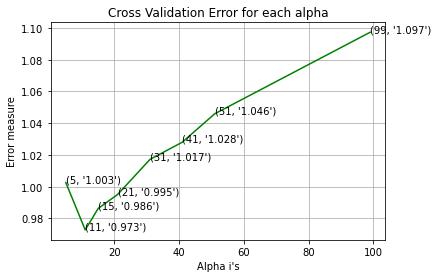

For values of best alpha =  11 The train log loss is: 0.5996660305798249
For values of best alpha =  11 The cross validation log loss is: 0.9727994824946959
For values of best alpha =  11 The test log loss is: 1.124618502849151


In [71]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 0.9727994824946959
Number of mis-classified points : 0.3383458646616541
-------------------- Confusion matrix --------------------


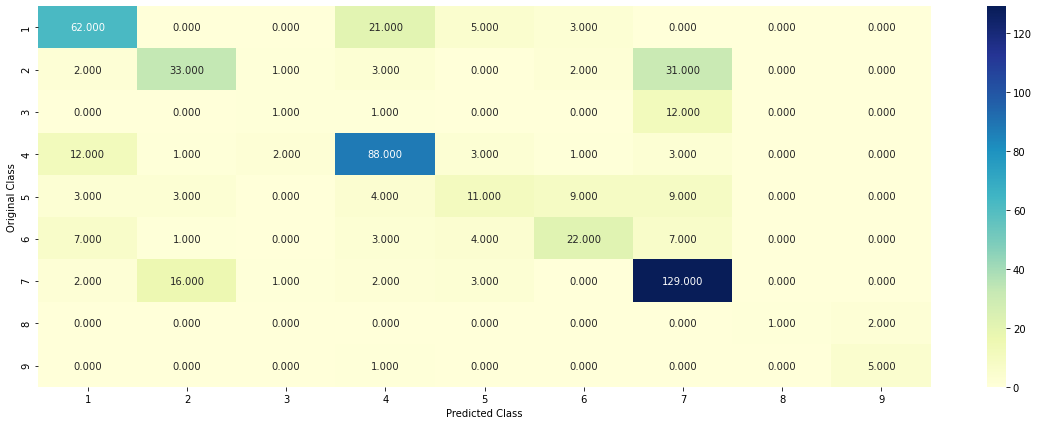

-------------------- Precision matrix (Columm Sum=1) --------------------


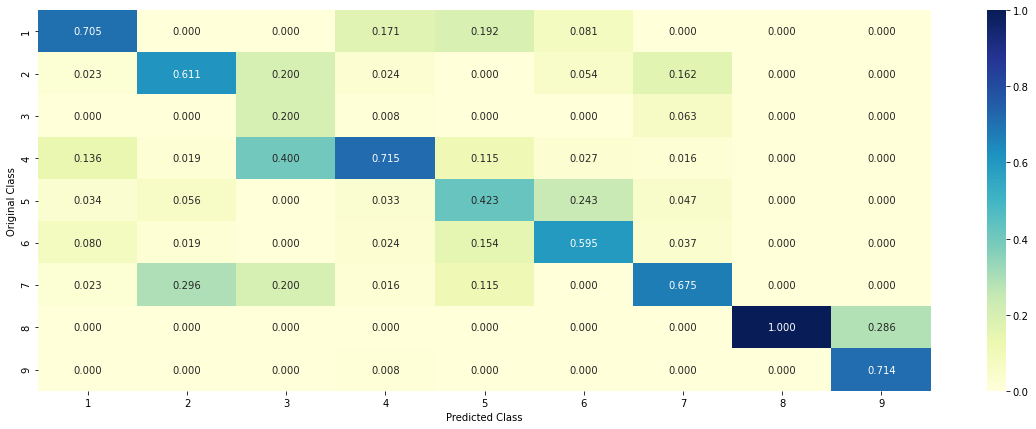

-------------------- Recall matrix (Row sum=1) --------------------


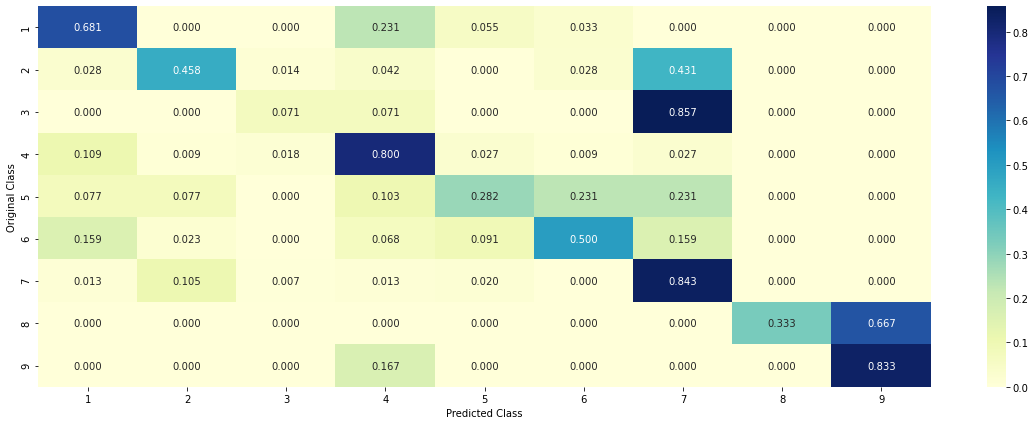

In [72]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [73]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])

#Get the nearest sample k-points
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 8
The  11  nearest neighbours of the test points belongs to classes [9 9 9 9 9 9 9 4 5 8 8]
Fequency of nearest points : Counter({9: 7, 8: 2, 4: 1, 5: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [74]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [7 7 2 7 2 7 2 7 7 7 2]
Fequency of nearest points : Counter({7: 7, 2: 4})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.2407862037714954
for alpha = 1e-05
Log Loss : 1.2447197704159207
for alpha = 0.0001
Log Loss : 1.0336409596080873
for alpha = 0.001
Log Loss : 0.9934413147978801
for alpha = 0.01
Log Loss : 1.1103893596707508
for alpha = 0.1
Log Loss : 1.4392632144911388
for alpha = 1
Log Loss : 1.6731505735107604
for alpha = 10
Log Loss : 1.7031026503139002
for alpha = 100
Log Loss : 1.706324783702432


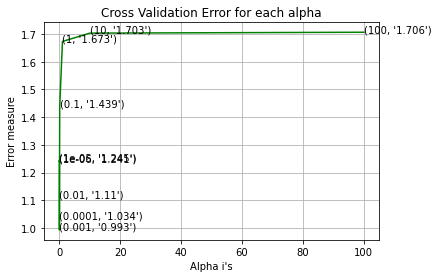

For values of best alpha =  0.001 The train log loss is: 0.5411831195276496
For values of best alpha =  0.001 The cross validation log loss is: 0.9934413147978801
For values of best alpha =  0.001 The test log loss is: 1.1115987609419677


In [75]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 0.9934413147978801
Number of mis-classified points : 0.29887218045112784
-------------------- Confusion matrix --------------------


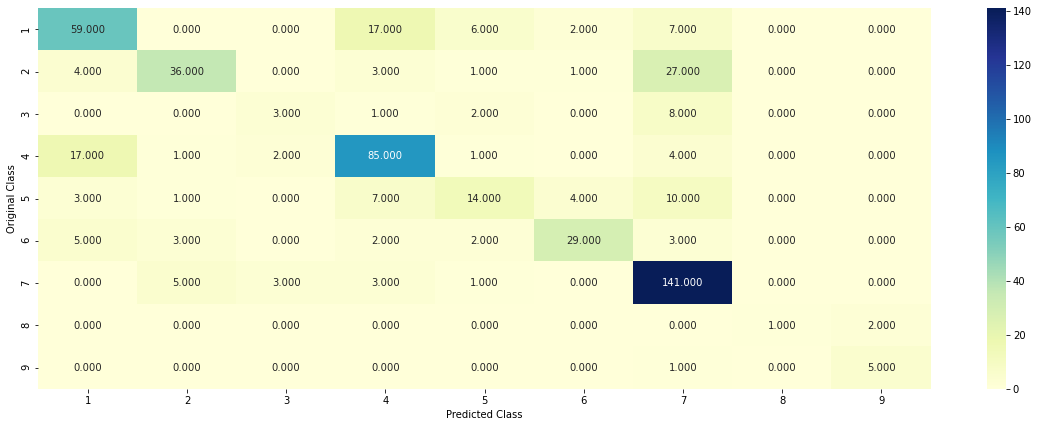

-------------------- Precision matrix (Columm Sum=1) --------------------


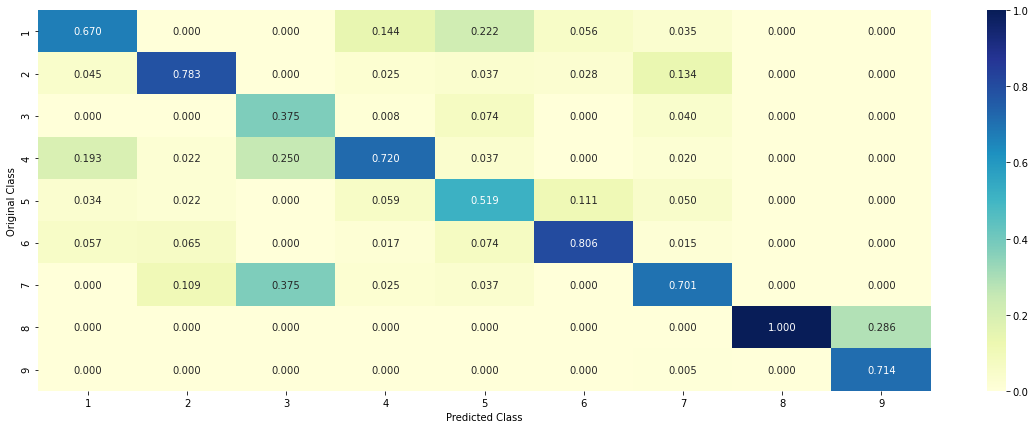

-------------------- Recall matrix (Row sum=1) --------------------


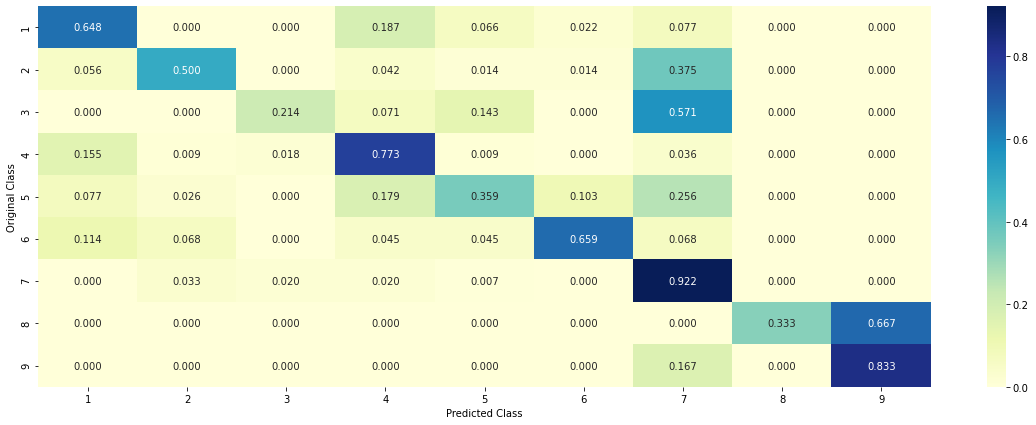

In [76]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [77]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [172]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

TypeError: 'int' object is not subscriptable

<h5>4.3.1.3.2. Correctly Classified point</h5>

In [79]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.000e+00 7.850e-02 0.000e+00 0.000e+00 1.000e-04 0.000e+00 9.105e-01
  1.090e-02 0.000e+00]]
Actual Class : 7
--------------------------------------------------
124 Text feature [missense] present in test data point [True]
131 Text feature [hki] present in test data point [True]
151 Text feature [constitutively] present in test data point [True]
169 Text feature [stat] present in test data point [True]
181 Text feature [suppressor] present in test data point [True]
187 Text feature [remove] present in test data point [True]
191 Text feature [3t3] present in test data point [True]
195 Text feature [mitogen] present in test data point [True]
203 Text feature [activated] present in test data point [True]
205 Text feature [transforming] present in test data point [True]
222 Text feature [oncogene] present in test data point [True]
237 Text feature [function] present in test data point [True]
240 Text feature [egfrs] present in test data

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.4790488819706833
for alpha = 1e-05
Log Loss : 1.4756804469643419
for alpha = 0.0001
Log Loss : 1.393598378038872
for alpha = 0.001
Log Loss : 1.130183821863981
for alpha = 0.01
Log Loss : 1.102516742671306
for alpha = 0.1
Log Loss : 1.1602986891841331
for alpha = 1
Log Loss : 1.2561083819401806


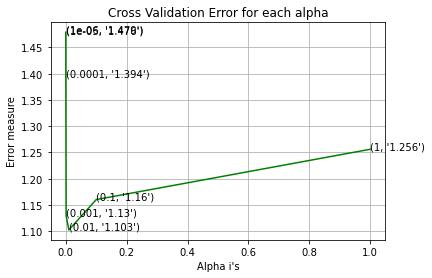

For values of best alpha =  0.01 The train log loss is: 0.6564165903039901
For values of best alpha =  0.01 The cross validation log loss is: 1.102516742671306
For values of best alpha =  0.01 The test log loss is: 1.2105237629139256


In [173]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.0174225478027012
Number of mis-classified points : 0.29699248120300753
-------------------- Confusion matrix --------------------


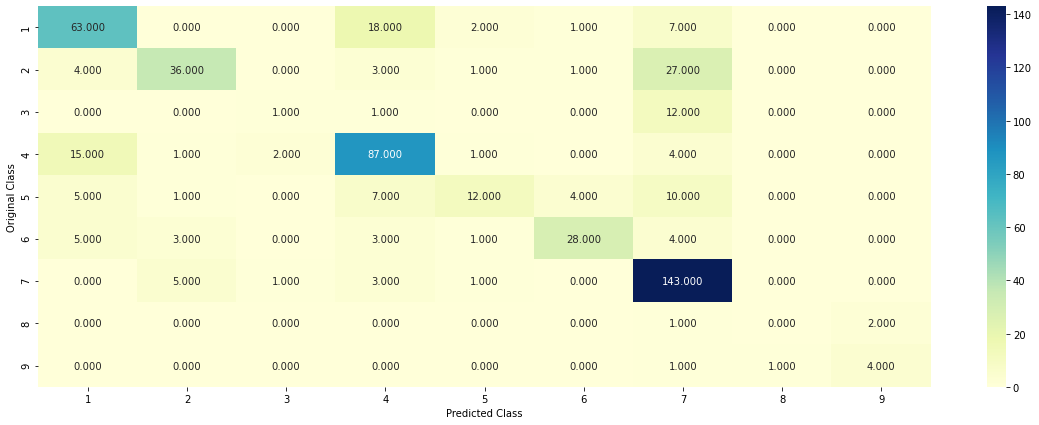

-------------------- Precision matrix (Columm Sum=1) --------------------


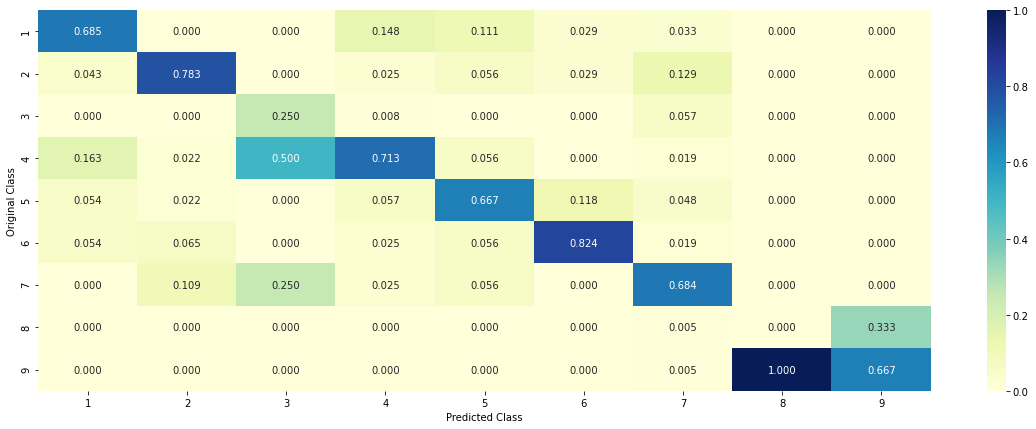

-------------------- Recall matrix (Row sum=1) --------------------


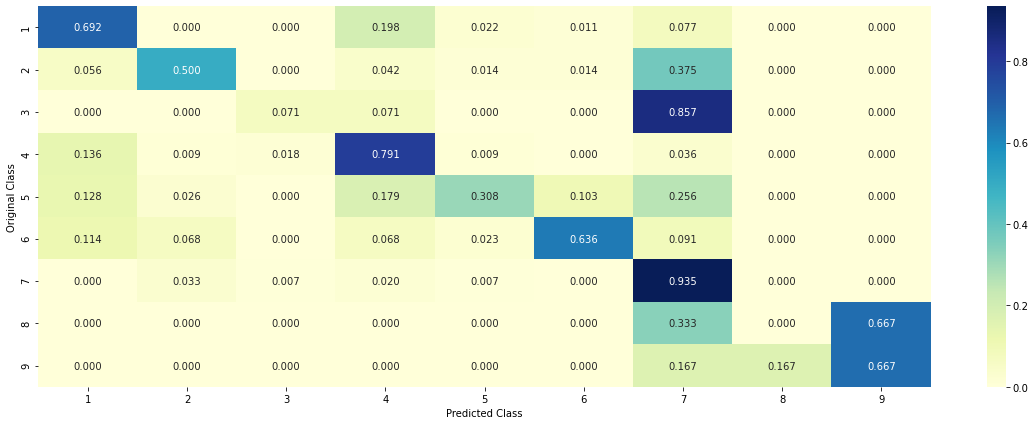

In [81]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)


clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [82]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[9.500e-03 1.650e-02 1.000e-04 2.800e-03 5.237e-01 1.000e-04 1.348e-01
  1.650e-02 2.959e-01]]
Actual Class : 8
--------------------------------------------------
430 Text feature [encodes] present in test data point [True]
449 Text feature [indicating] present in test data point [True]
451 Text feature [charmm] present in test data point [True]
454 Text feature [identified] present in test data point [True]
482 Text feature [1a] present in test data point [True]
Out of the top  500  features  5 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [83]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.000e+00 1.284e-01 0.000e+00 0.000e+00 1.000e-04 0.000e+00 8.640e-01
  7.600e-03 0.000e+00]]
Actual Class : 7
--------------------------------------------------
143 Text feature [hki] present in test data point [True]
220 Text feature [272] present in test data point [True]
235 Text feature [3t3] present in test data point [True]
240 Text feature [transforming] present in test data point [True]
256 Text feature [constitutively] present in test data point [True]
293 Text feature [stat] present in test data point [True]
316 Text feature [mitogen] present in test data point [True]
366 Text feature [activated] present in test data point [True]
393 Text feature [missense] present in test data point [True]
405 Text feature [remove] present in test data point [True]
413 Text feature [oncogene] present in test data point [True]
420 Text feature [activating] present in test data point [True]
448 Text feature [egfrs] present in test data poin

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.2538531685947851
for C = 0.0001
Log Loss : 1.136912397625132
for C = 0.001
Log Loss : 1.0254761371037229
for C = 0.01
Log Loss : 1.0365207179835096
for C = 0.1
Log Loss : 1.339097409437539
for C = 1
Log Loss : 1.6923505153550626
for C = 10
Log Loss : 1.70691708615346
for C = 100
Log Loss : 1.7069173019206596


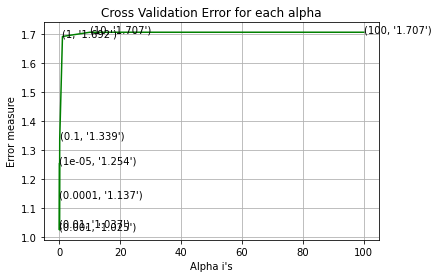

For values of best alpha =  0.001 The train log loss is: 0.5593940475305746
For values of best alpha =  0.001 The cross validation log loss is: 1.0254761371037229
For values of best alpha =  0.001 The test log loss is: 1.1589934071413803


In [84]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0254761371037229
Number of mis-classified points : 0.31390977443609025
-------------------- Confusion matrix --------------------


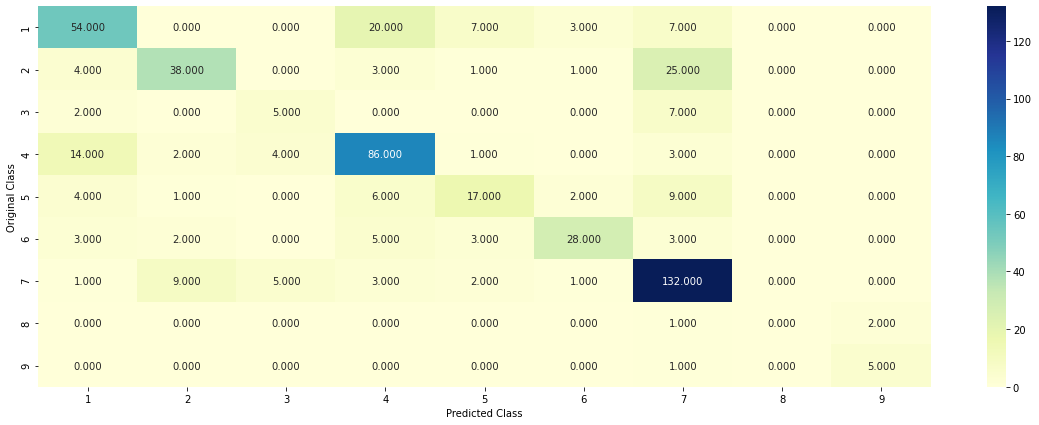

-------------------- Precision matrix (Columm Sum=1) --------------------


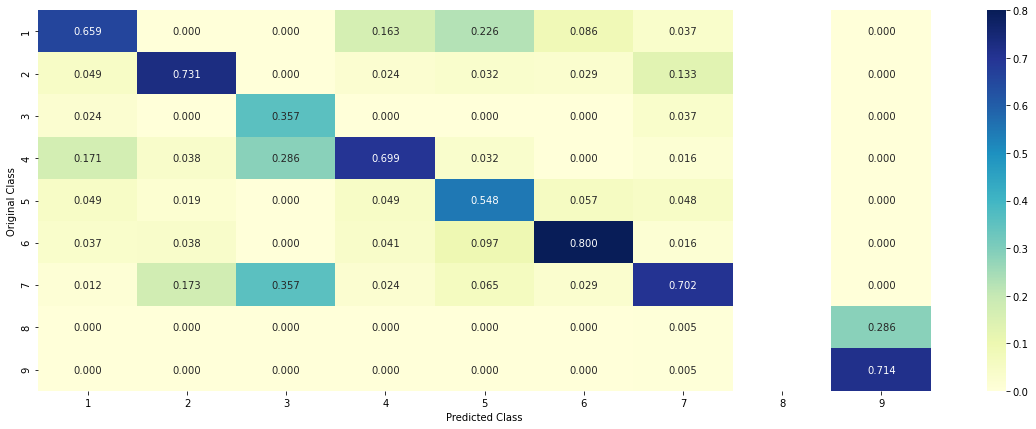

-------------------- Recall matrix (Row sum=1) --------------------


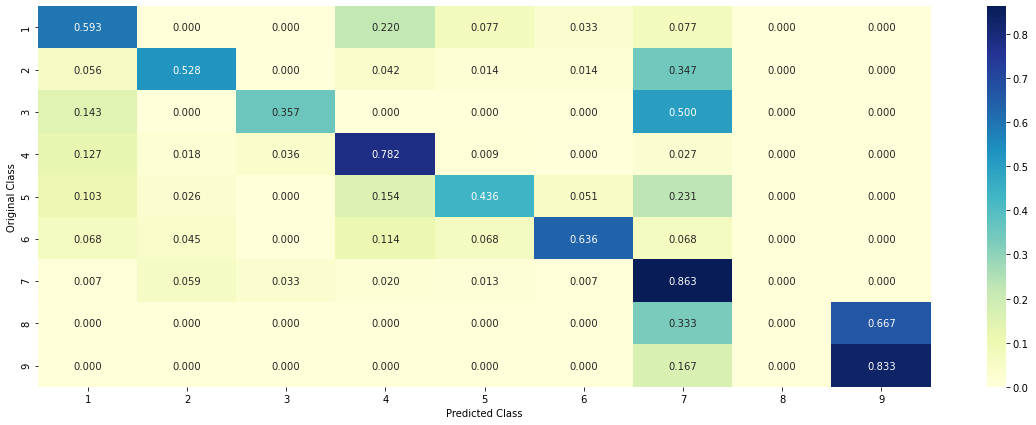

In [85]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [86]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 9
Predicted Class Probabilities: [[0.0274 0.0176 0.0023 0.0016 0.2333 0.0025 0.0649 0.0029 0.6474]]
Actual Class : 8
--------------------------------------------------
12 Text feature [orbitrap] present in test data point [True]
219 Text feature [consumption] present in test data point [True]
223 Text feature [kolker] present in test data point [True]
229 Text feature [pig] present in test data point [True]
235 Text feature [quenched] present in test data point [True]
268 Text feature [latini] present in test data point [True]
277 Text feature [electrospray] present in test data point [True]
289 Text feature [denton] present in test data point [True]
290 Text feature [aconitate] present in test data point [True]
291 Text feature [7890a] present in test data point [True]
292 Text feature [ctgcctctttgtggcctaag] present in test data point [True]
293 Text feature [exactive] present in test data point [True]
294 Text feature [703185] present in test data point [True]
295 T

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [87]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[3.720e-02 1.455e-01 7.000e-04 4.400e-03 4.700e-03 3.000e-04 8.014e-01
  4.000e-03 1.800e-03]]
Actual Class : 7
--------------------------------------------------
166 Text feature [hki] present in test data point [True]
202 Text feature [272] present in test data point [True]
359 Text feature [nonresponder] present in test data point [True]
384 Text feature [superimposes] present in test data point [True]
437 Text feature [sirna1] present in test data point [True]
461 Text feature [3t3] present in test data point [True]
Out of the top  500  features  6 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [88]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2614610292509238
for n_estimators = 100 and max depth =  10
Log Loss : 1.1799771399350376
for n_estimators = 200 and max depth =  5
Log Loss : 1.2542949239163952
for n_estimators = 200 and max depth =  10
Log Loss : 1.1709924300115853
for n_estimators = 500 and max depth =  5
Log Loss : 1.241053426216087
for n_estimators = 500 and max depth =  10
Log Loss : 1.1636381509360918
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2331507155735215
for n_estimators = 1000 and max depth =  10
Log Loss : 1.159872486296071
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2329228604796971
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1576644803098401
For values of best estimator =  2000 The train log loss is: 0.6930919378376775
For values of best estimator =  2000 The cross validation log loss is: 1.1576644803098401
For values of best estimator =  2000 The test log loss is: 1.1726000594397492


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1576644803098401
Number of mis-classified points : 0.37406015037593987
-------------------- Confusion matrix --------------------


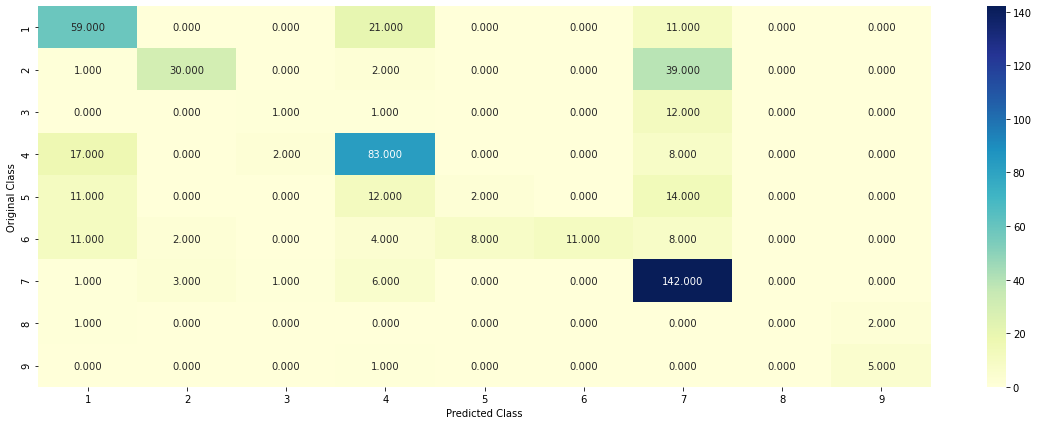

-------------------- Precision matrix (Columm Sum=1) --------------------


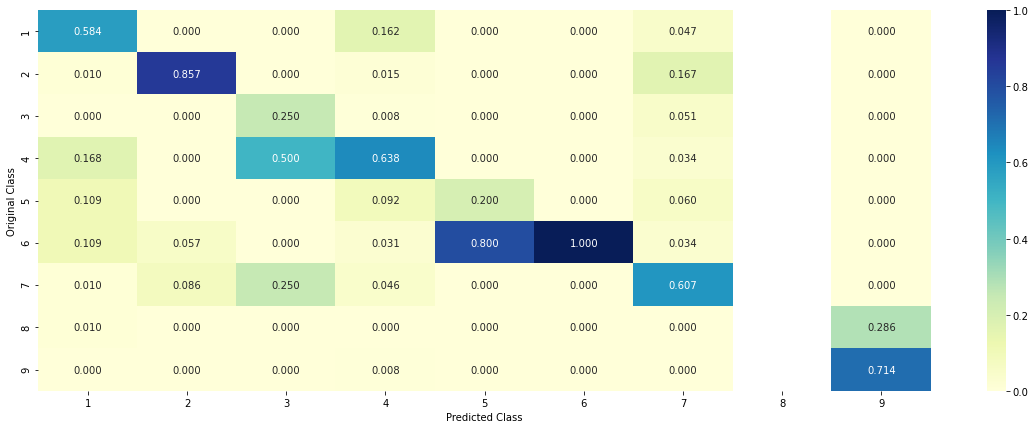

-------------------- Recall matrix (Row sum=1) --------------------


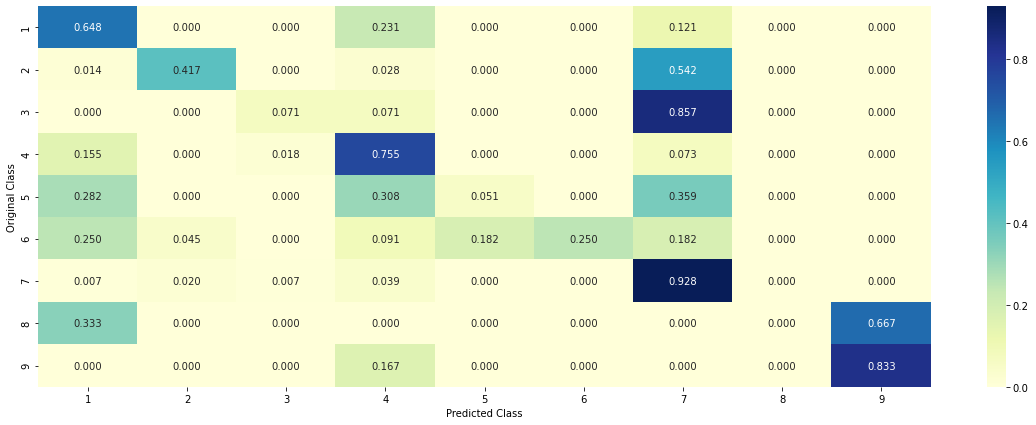

In [89]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [90]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 9
Predicted Class Probabilities: [[0.1546 0.0723 0.0206 0.1052 0.061  0.0381 0.2665 0.0088 0.2728]]
Actual Class : 8
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
3 Text feature [activation] present in test data point [True]
4 Text feature [inhibitor] present in test data point [True]
6 Text feature [phosphorylation] present in test data point [True]
7 Text feature [missense] present in test data point [True]
8 Text feature [constitutive] present in test data point [True]
10 Text feature [activated] present in test data point [True]
11 Text feature [function] present in test data point [True]
12 Text feature [trials] present in test data point [True]
13 Text feature [suppressor] present in test data point [True]
16 Text feature [oncogenic] present in test data point [True]
17 Text feature [signaling] present in test data point [True]
18 Text fea

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [91]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0184 0.2156 0.0127 0.0176 0.0263 0.0221 0.6804 0.004  0.0029]]
Actuall Class : 7
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
2 Text feature [inhibitors] present in test data point [True]
3 Text feature [activation] present in test data point [True]
4 Text feature [inhibitor] present in test data point [True]
5 Text feature [tyrosine] present in test data point [True]
6 Text feature [phosphorylation] present in test data point [True]
7 Text feature [missense] present in test data point [True]
10 Text feature [activated] present in test data point [True]
11 Text feature [function] present in test data point [True]
12 Text feature [trials] present in test data point [True]
13 Text feature [suppressor] present in test data point [True]
14 Text feature [constitutively] present in test data point [True]
15 Text f

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [92]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.9619335756855174
for n_estimators = 10 and max depth =  3
Log Loss : 1.5953542007804566
for n_estimators = 10 and max depth =  5
Log Loss : 1.3811780124906206
for n_estimators = 10 and max depth =  10
Log Loss : 1.9020965451341347
for n_estimators = 50 and max depth =  2
Log Loss : 1.6522145630870255
for n_estimators = 50 and max depth =  3
Log Loss : 1.4257799374003746
for n_estimators = 50 and max depth =  5
Log Loss : 1.3156549684563652
for n_estimators = 50 and max depth =  10
Log Loss : 1.7690919016651514
for n_estimators = 100 and max depth =  2
Log Loss : 1.5459344866616895
for n_estimators = 100 and max depth =  3
Log Loss : 1.4345931189982957
for n_estimators = 100 and max depth =  5
Log Loss : 1.2869640825154471
for n_estimators = 100 and max depth =  10
Log Loss : 1.6981247038740719
for n_estimators = 200 and max depth =  2
Log Loss : 1.5957516258539208
for n_estimators = 200 and max depth =  3
Log Loss : 1.48907391451514

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.2869640825154471
Number of mis-classified points : 0.4718045112781955
-------------------- Confusion matrix --------------------


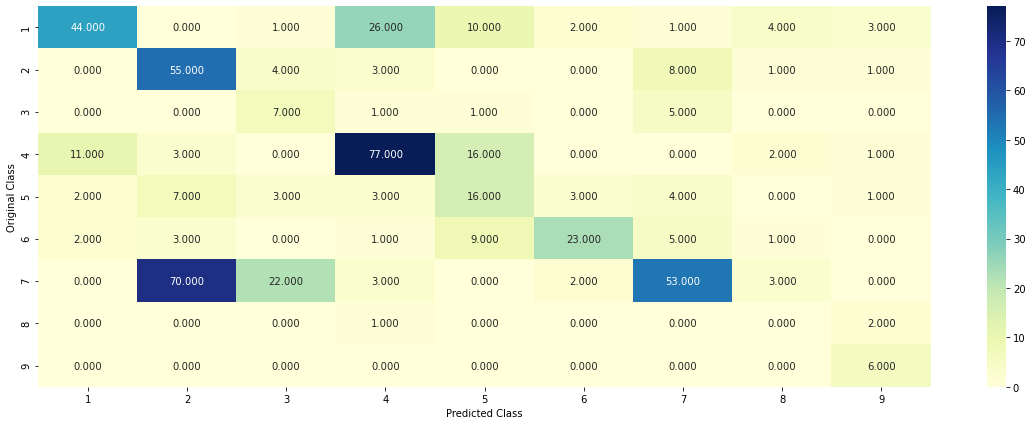

-------------------- Precision matrix (Columm Sum=1) --------------------


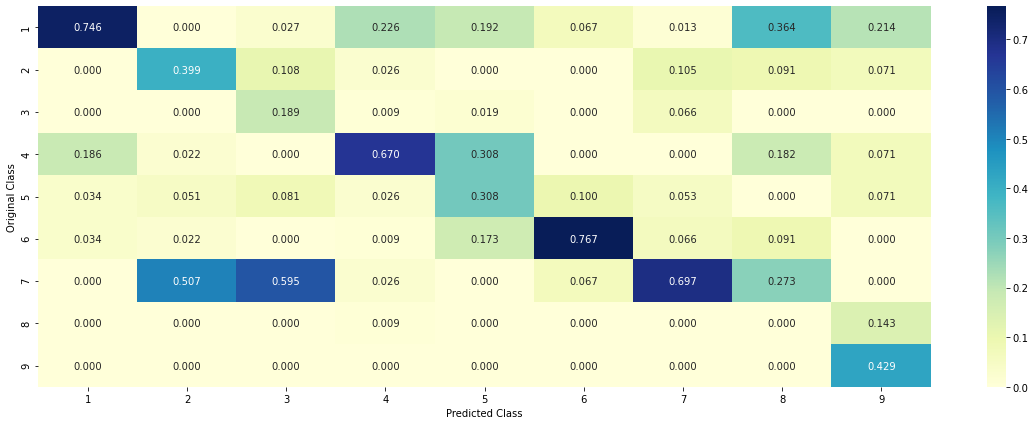

-------------------- Recall matrix (Row sum=1) --------------------


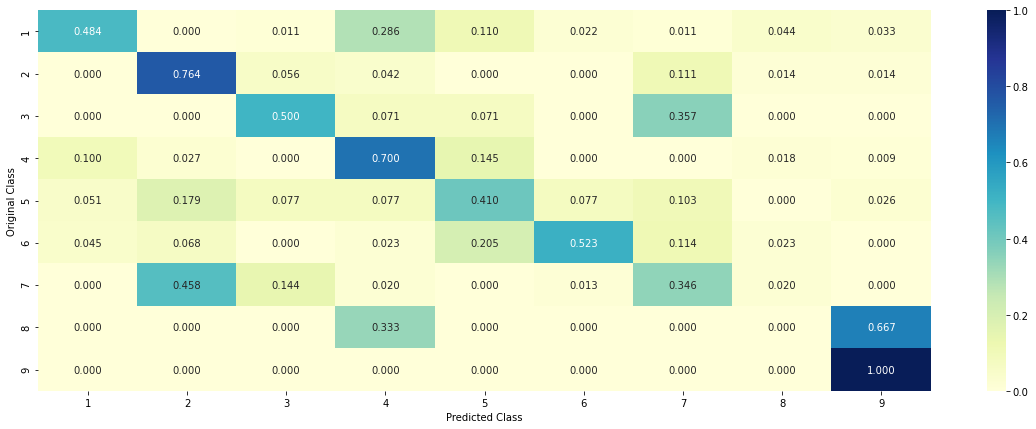

In [93]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [94]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 9
Predicted Class Probabilities: [[0.049  0.0397 0.0607 0.1004 0.0411 0.0373 0.0193 0.1661 0.4864]]
Actual Class : 8
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Text is important feature
Variation is important feature
Variation is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [95]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0131 0.564  0.0554 0.0151 0.02   0.0334 0.1918 0.0959 0.0112]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Text is important feature
Variation is important feature
Variation is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [96]:

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.00
Support vector machines : Log Loss: 1.69
Naive Bayes : Log Loss: 1.24
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.818
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.723
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.306
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.050
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.202
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.468


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.5255885725942196
Log loss (CV) on the stacking classifier : 1.0500173470162273
Log loss (test) on the stacking classifier : 1.1970372860114933
Number of missclassified point : 0.37593984962406013
-------------------- Confusion matrix --------------------


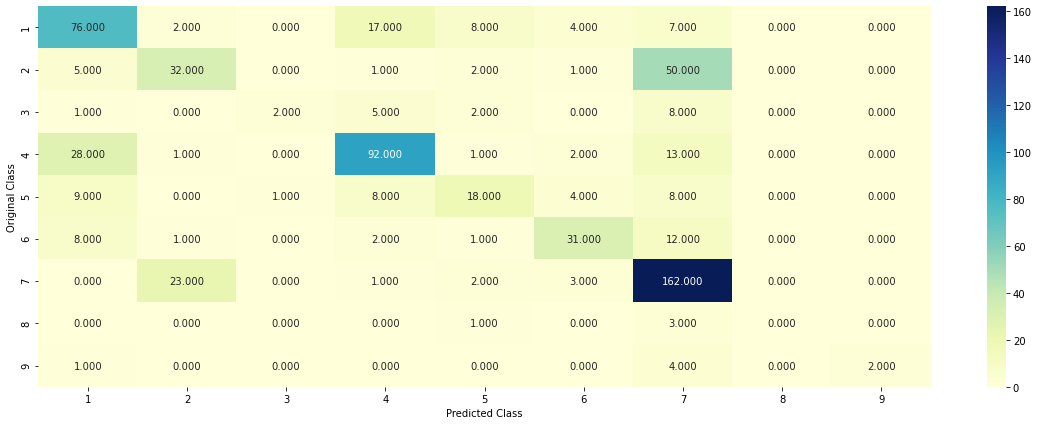

-------------------- Precision matrix (Columm Sum=1) --------------------


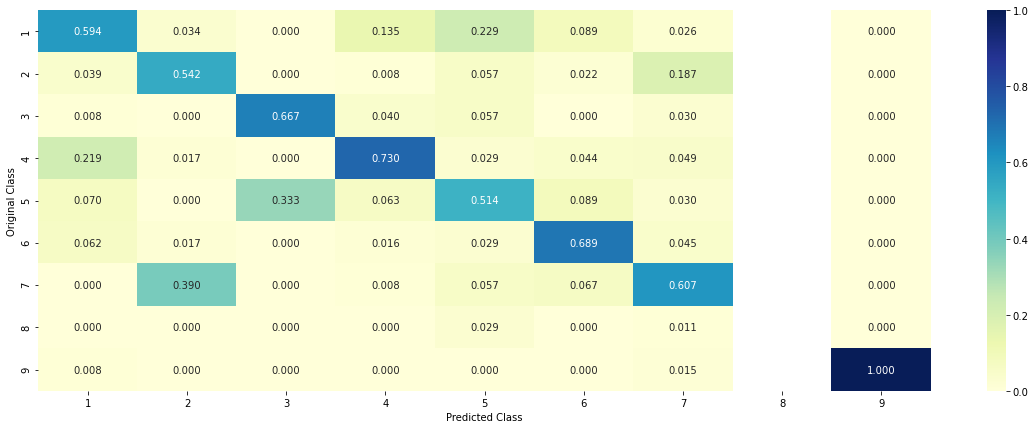

-------------------- Recall matrix (Row sum=1) --------------------


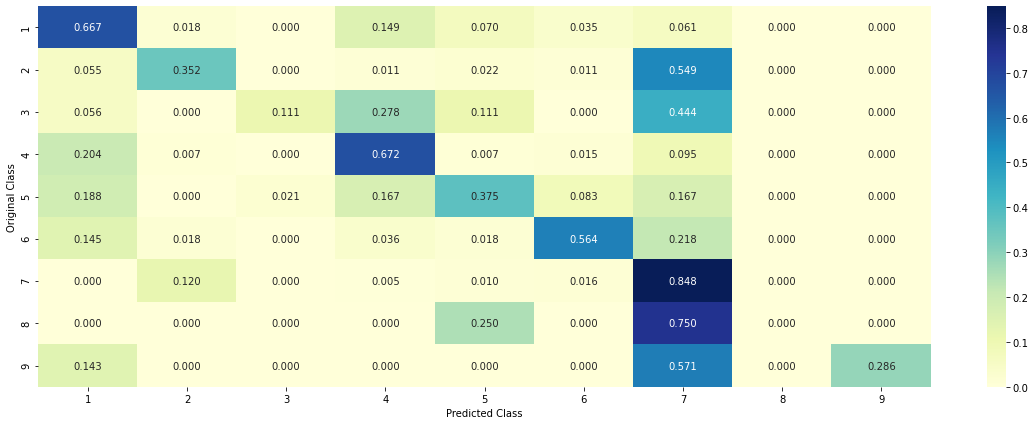

In [97]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8882922174011036
Log loss (CV) on the VotingClassifier : 1.1397291478790217
Log loss (test) on the VotingClassifier : 1.2329858570744072
Number of missclassified point : 0.37593984962406013
-------------------- Confusion matrix --------------------


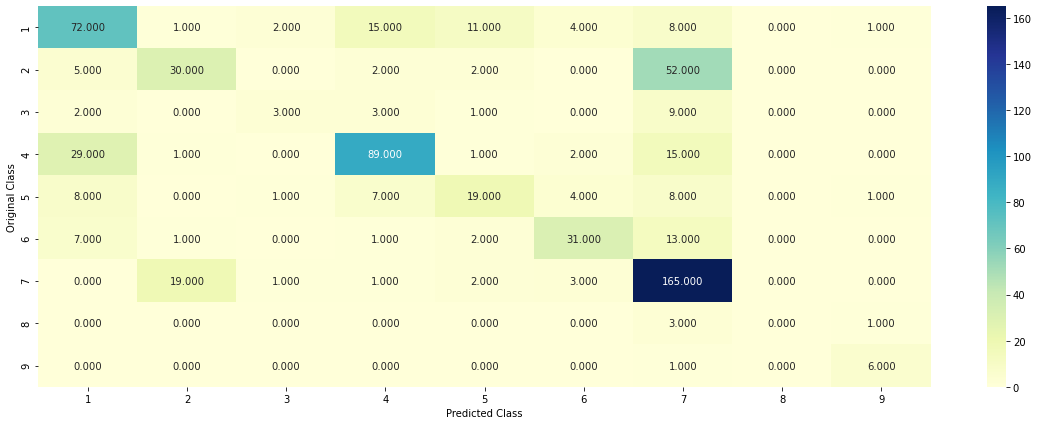

-------------------- Precision matrix (Columm Sum=1) --------------------


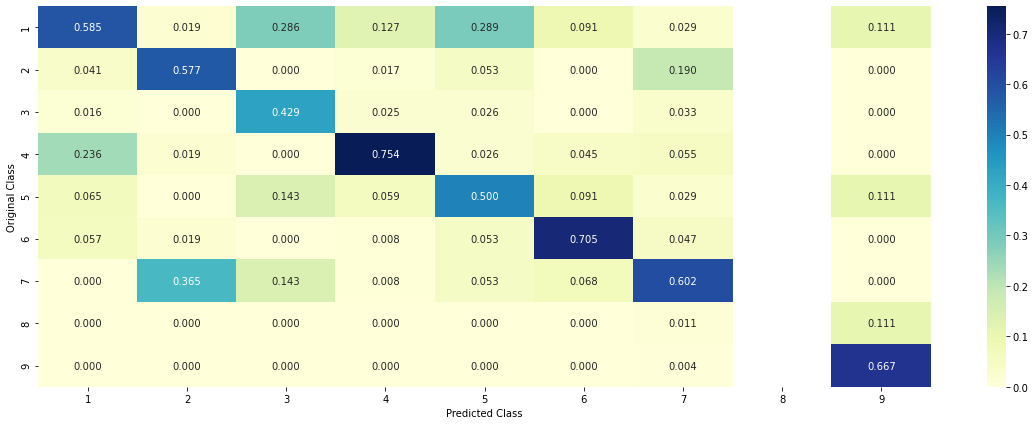

-------------------- Recall matrix (Row sum=1) --------------------


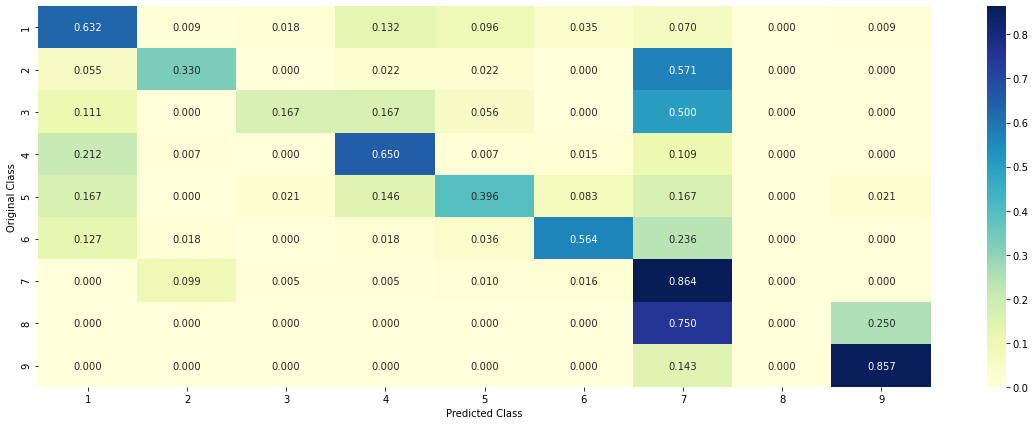

In [98]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

<h2> Extensions to the above approaches </h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
</ol>

### Split the data into train, test and CV

In [99]:
# split the data into test and train by maintaining same distribution of output variable 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

### Apply TF-IDF vectors to train, test and CV datasets

In [107]:
# Building a tf-idf with all the words that occured minimum 3 times in train data
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(min_df=10, max_features=1000)
train_text_feature_tf_idf = tf_idf_vectorizer.fit_transform(train_df['TEXT'])
train_text_feature_tf_idf = normalize(train_text_feature_tf_idf,axis=0)


# getting all the feature names (words)
train_text_features = tf_idf_vectorizer.get_feature_names()

# train_text_feature_tf_idf.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_tf_idf.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))


Total number of unique words in train data : 1000


In [108]:
#Applying to test text feature
# we use the same vectorizer that was trained on train data
test_text_feature_tf_idf = tf_idf_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_tf_idf = normalize(test_text_feature_tf_idf, axis=0)

#Applying to CV text feature
# we use the same vectorizer that was trained on tr ain data
cv_text_feature_tf_idf = tf_idf_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_tf_idf = normalize(cv_text_feature_tf_idf, axis=0)

### Stacking the features to get the final datasets

In [109]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

# For adding multiple CSR matrices, need to do a hstack and then convert them to CSR using tocsr()
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_tf_idf = hstack((train_gene_var_onehotCoding, train_text_feature_tf_idf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tf_idf = hstack((test_gene_var_onehotCoding, test_text_feature_tf_idf)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_tf_idf = hstack((cv_gene_var_onehotCoding, cv_text_feature_tf_idf)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [110]:
print("One hot encoding and TF-IDF features :")
print("(number of data points * number of features) in train data = ", train_x_tf_idf.shape)
print("(number of data points * number of features) in test data = ", test_x_tf_idf.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_tf_idf.shape)

One hot encoding and TF-IDF features :
(number of data points * number of features) in train data =  (2124, 3181)
(number of data points * number of features) in test data =  (665, 3181)
(number of data points * number of features) in cross validation data = (532, 3181)


### Naive Bayes Classifier

for alpha = 1e-05
Log Loss : 1.1108520511432376
for alpha = 0.0001
Log Loss : 1.1093011568231443
for alpha = 0.001
Log Loss : 1.1067521978564576
for alpha = 0.1
Log Loss : 1.1363939070608933
for alpha = 1
Log Loss : 1.2710405113931185
for alpha = 10
Log Loss : 1.511524053163257
for alpha = 100
Log Loss : 1.446798859264069
for alpha = 1000
Log Loss : 1.4243757574077016


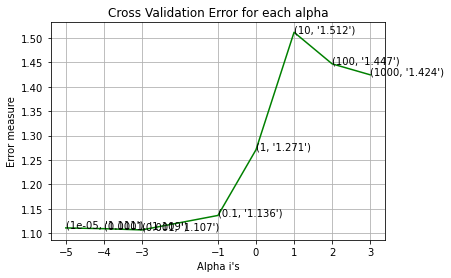

For values of best alpha =  0.001 The train log loss is: 0.44509205110382793
For values of best alpha =  0.001 The cross validation log loss is: 1.1067521978564576
For values of best alpha =  0.001 The test log loss is: 1.2486556839062133


In [111]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_tf_idf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tf_idf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tf_idf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)


predict_y_tr = sig_clf.predict_proba(train_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))


Log Loss : 1.1067521978564576
Number of missclassified point : 0.34962406015037595
-------------------- Confusion matrix --------------------


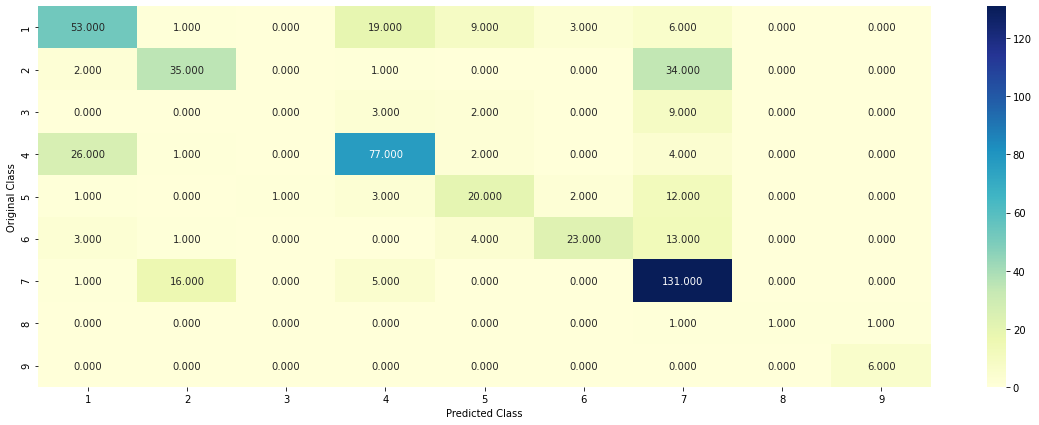

-------------------- Precision matrix (Columm Sum=1) --------------------


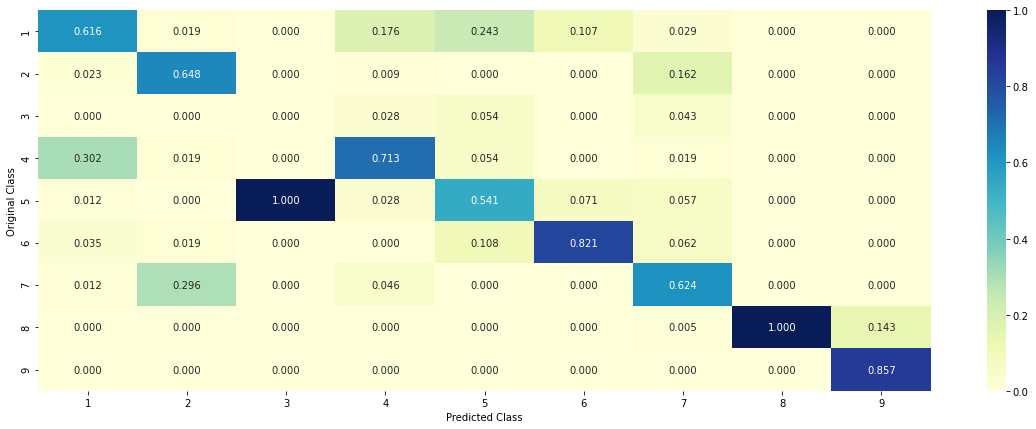

-------------------- Recall matrix (Row sum=1) --------------------


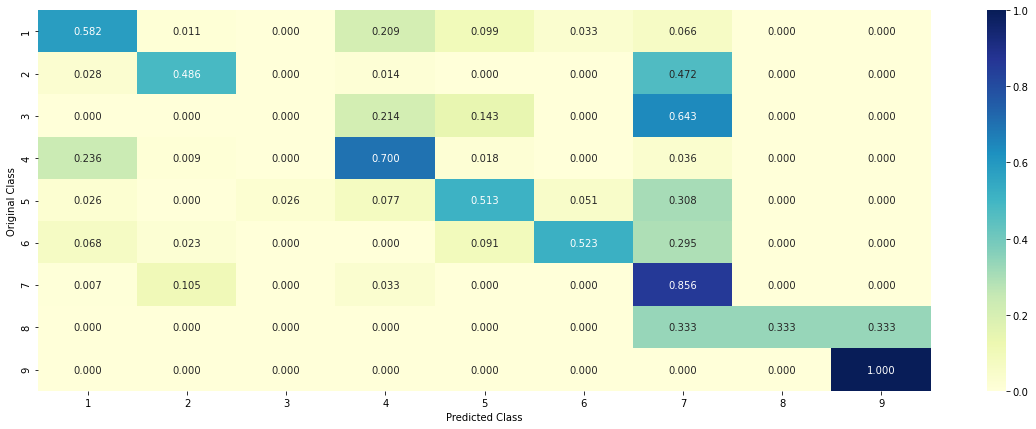

In [112]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_tf_idf)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_tf_idf)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_tf_idf.toarray()))

In [113]:
#Calculate the misclassificate rate

def misclassication_rate(y_test,predict_y_tst):
    pts_class=0
    for i in range(len(y_test)):
        if y_test[i]==predict_y_tst[i]:
            pts_class+=1
    return (1-(pts_class/y_test.shape[0]))


### Printing the Results

In [116]:
from prettytable import PrettyTable
results = PrettyTable()
results.field_names = ["Model name", "Train error", "CV Error", "Test Error","% misclassified points"]

In [117]:
predict_y_tst_class = sig_clf.predict(test_x_tf_idf)
results.add_row(["Naive Bayes with TF-IDF",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15),log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15),log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+-------------------------+---------------------+--------------------+--------------------+------------------------+
|        Model name       |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+-------------------------+---------------------+--------------------+--------------------+------------------------+
| Naive Bayes with TF-IDF | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
+-------------------------+---------------------+--------------------+--------------------+------------------------+


### Logistic Regression with Class Balancing

for alpha = 0.0001
Log Loss : 0.8719543280838714
for alpha = 0.0002
Log Loss : 0.8749948249014994
for alpha = 0.0003
Log Loss : 0.8811565820064455
for alpha = 0.0004
Log Loss : 0.8870054119861563
for alpha = 0.0005
Log Loss : 0.8922432224482785
for alpha = 0.0006
Log Loss : 0.8974519644388741
for alpha = 0.0007
Log Loss : 0.9030193095508308
for alpha = 0.0008
Log Loss : 0.9079264701988264
for alpha = 0.0009
Log Loss : 0.9126877689934807
for alpha = 0.001
Log Loss : 0.9177641025518251


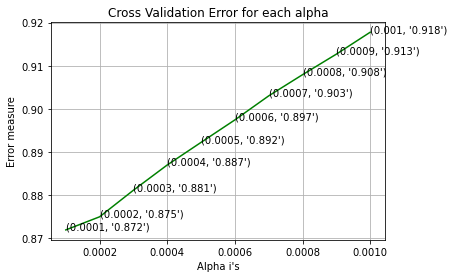

For values of best alpha =  0.0001 The train log loss is: 0.3950289786652773
For values of best alpha =  0.0001 The cross validation log loss is: 0.8719543280838714
For values of best alpha =  0.0001 The test log loss is: 1.0870427816683923


In [118]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
alpha = [np.round(0.0001*(1+i),4) for i in range(10)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tf_idf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tf_idf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tf_idf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot((alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)

predict_y_tr = sig_clf.predict_proba(train_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

Log loss : 0.8719543280838714
Number of mis-classified points : 0.30451127819548873
-------------------- Confusion matrix --------------------


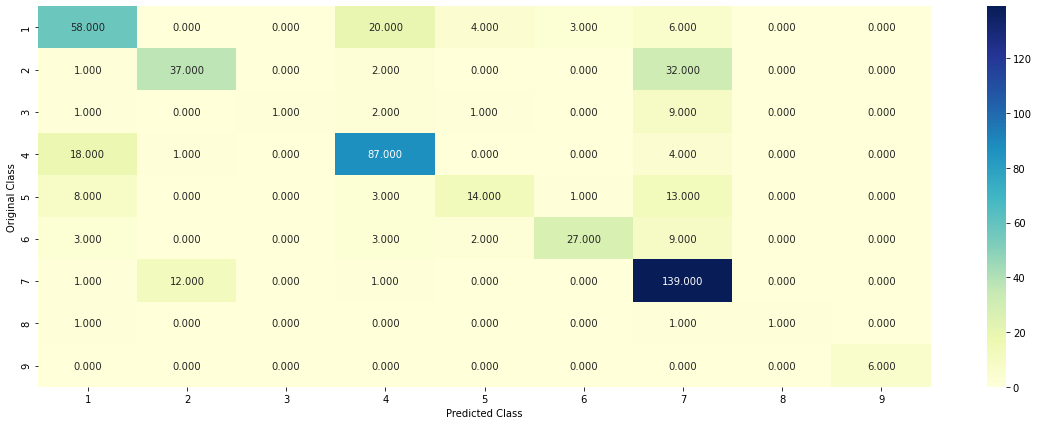

-------------------- Precision matrix (Columm Sum=1) --------------------


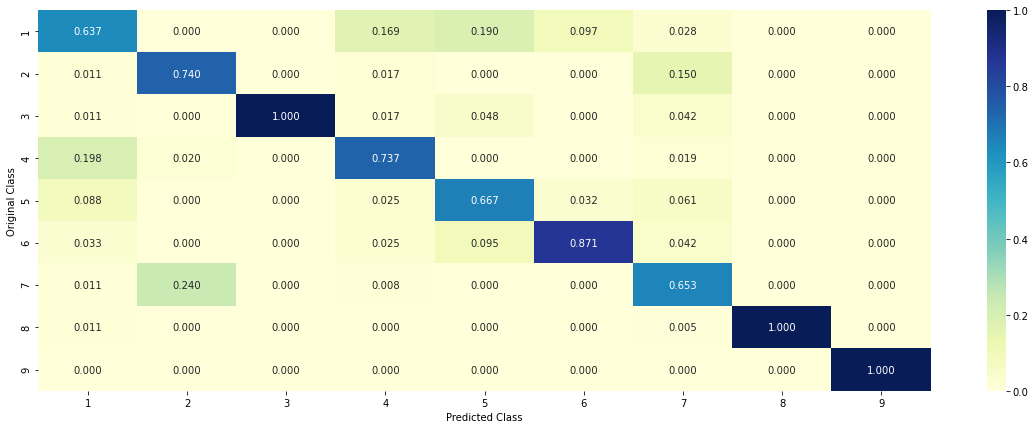

-------------------- Recall matrix (Row sum=1) --------------------


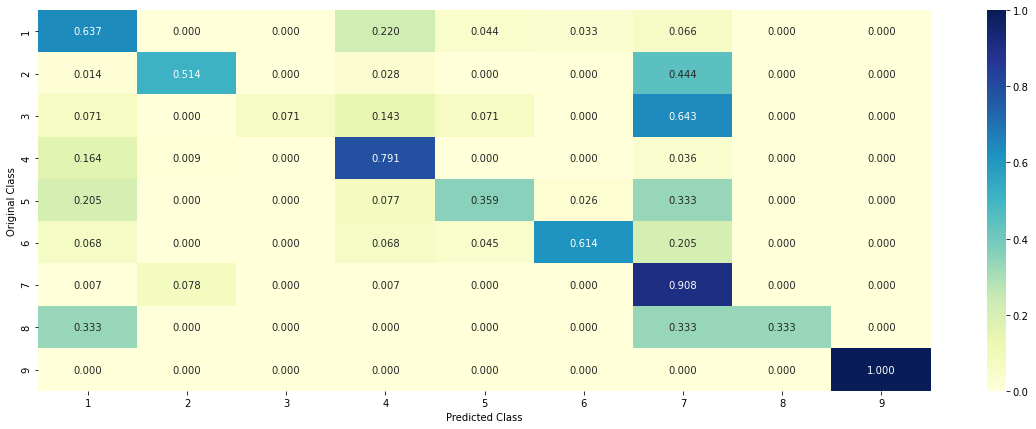

In [119]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tf_idf, train_y, cv_x_tf_idf, cv_y, clf)

In [120]:
predict_y_tst_class = sig_clf.predict(test_x_tf_idf)
results.add_row(["Log Reg with class balancing",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-2),log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15),misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+------------------------------+---------------------+--------------------+--------------------+------------------------+
|          Model name          |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+------------------------------+---------------------+--------------------+--------------------+------------------------+
|   Naive Bayes with TF-IDF    | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
| Log Reg with class balancing | 0.40980182935868736 | 0.8719543280838714 | 1.0870427816683923 |  0.35639097744360904   |
+------------------------------+---------------------+--------------------+--------------------+------------------------+


In [121]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

In [122]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tf_idf,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tf_idf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tf_idf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[7.057e-01 1.110e-02 1.100e-03 2.531e-01 2.080e-02 3.600e-03 1.000e-03
  3.000e-03 7.000e-04]]
Actual Class : 1
--------------------------------------------------
64 Text feature [100] present in test data point [True]
344 Text feature [120436] present in test data point [True]
468 Text feature [1277] present in test data point [True]
Out of the top  500  features  3 are present in query point


### Logistic Regression without Class balancing

for alpha = 0.0001
Log Loss : 0.906292078879508
for alpha = 0.0002
Log Loss : 0.9091309942084249
for alpha = 0.0003
Log Loss : 0.9195910708331086
for alpha = 0.0004
Log Loss : 0.9324927074771849
for alpha = 0.0005
Log Loss : 0.9456791103950734
for alpha = 0.0006
Log Loss : 0.9568307639259259
for alpha = 0.0007
Log Loss : 0.9677788218281205
for alpha = 0.0008
Log Loss : 0.9771750861564404
for alpha = 0.0009
Log Loss : 0.986201812489648
for alpha = 0.001
Log Loss : 0.9941247082860729


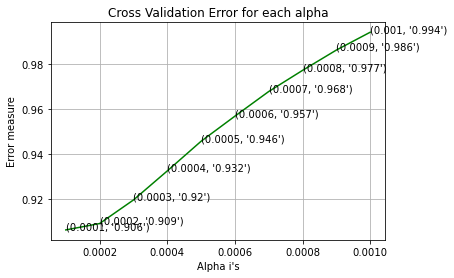

For values of best alpha =  0.0001 The train log loss is: 0.3844745504166274
For values of best alpha =  0.0001 The cross validation log loss is: 0.906292078879508
For values of best alpha =  0.0001 The test log loss is: 1.1059372496421178


In [123]:
alpha = [np.round(0.0001*(1+i),4) for i in range(10)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tf_idf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tf_idf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tf_idf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)

predict_y_tr = sig_clf.predict_proba(train_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

Log loss : 0.906292078879508
Number of mis-classified points : 0.31203007518796994
-------------------- Confusion matrix --------------------


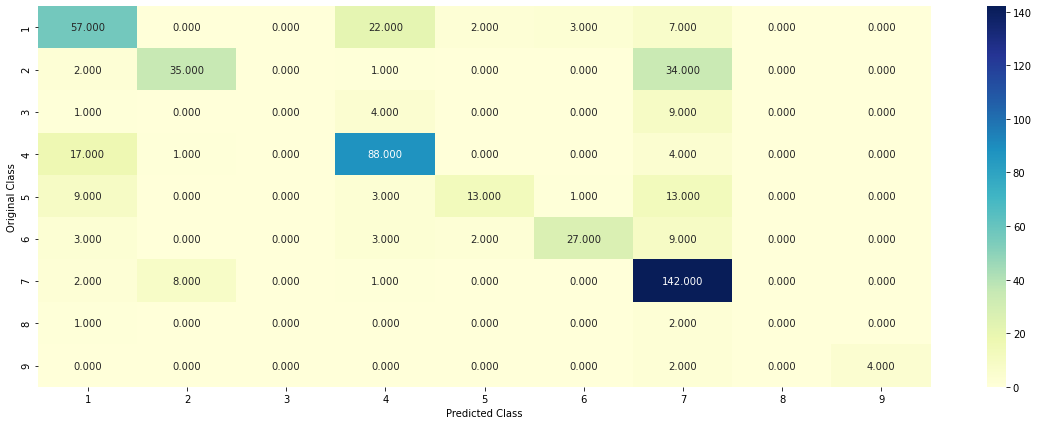

-------------------- Precision matrix (Columm Sum=1) --------------------


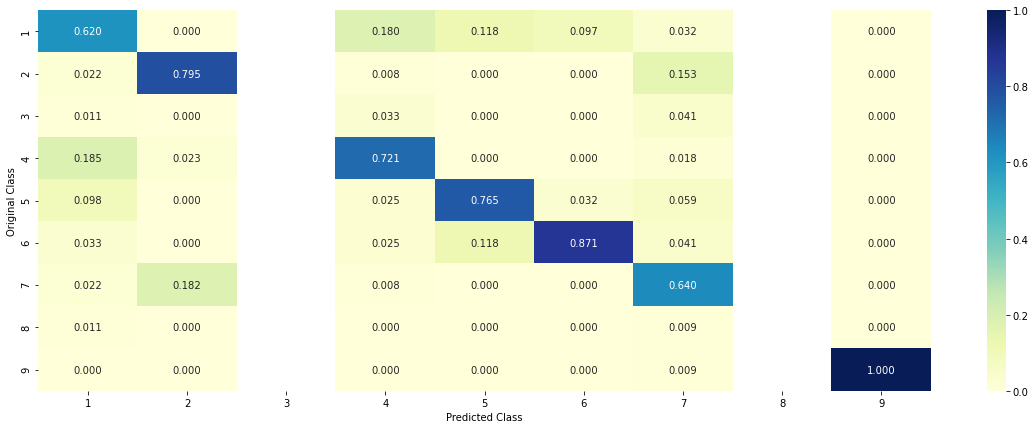

-------------------- Recall matrix (Row sum=1) --------------------


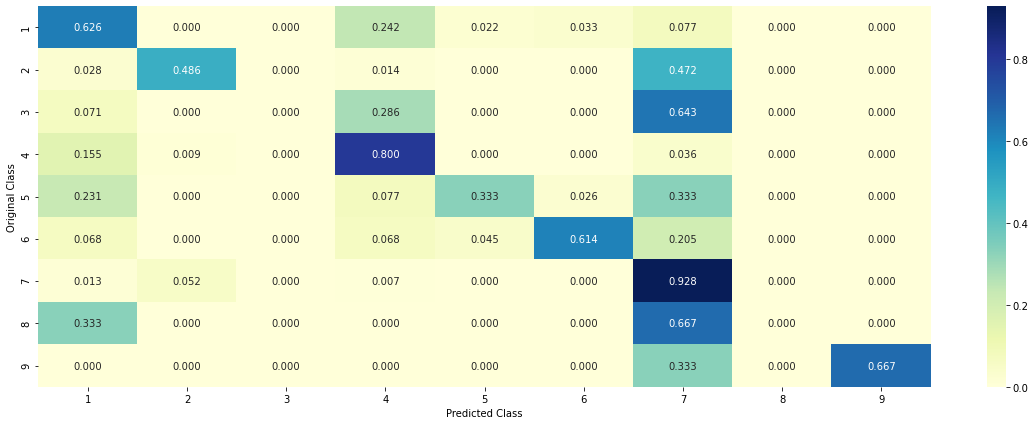

In [124]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tf_idf, train_y, cv_x_tf_idf, cv_y, clf)

In [125]:

test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tf_idf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tf_idf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[6.503e-01 9.800e-03 9.000e-04 3.149e-01 1.740e-02 3.000e-03 9.000e-04
  2.400e-03 4.000e-04]]
Actual Class : 1
--------------------------------------------------
72 Text feature [100] present in test data point [True]
360 Text feature [120436] present in test data point [True]
Out of the top  500  features  2 are present in query point


In [127]:
predict_y_tst_class = sig_clf.predict(test_x_tf_idf)
results.add_row(["Log Reg w/o class balancing",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15),log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15),misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+------------------------------+---------------------+--------------------+--------------------+------------------------+
|          Model name          |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+------------------------------+---------------------+--------------------+--------------------+------------------------+
|   Naive Bayes with TF-IDF    | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
| Log Reg with class balancing | 0.40980182935868736 | 0.8719543280838714 | 1.0870427816683923 |  0.35639097744360904   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
+------------------------------+---------------------+--------------------+--------------------+------------------------+


### Linear SVM

for C = 1e-05
Log Loss : 0.9907477217861937
for C = 0.0001
Log Loss : 0.9215510032372161
for C = 0.001
Log Loss : 0.9565604882146174
for C = 0.01
Log Loss : 1.3048970900113115
for C = 0.1
Log Loss : 1.6334827502416718
for C = 1
Log Loss : 1.8078675098061983
for C = 10
Log Loss : 1.8078676451237945
for C = 100
Log Loss : 1.807867641241188


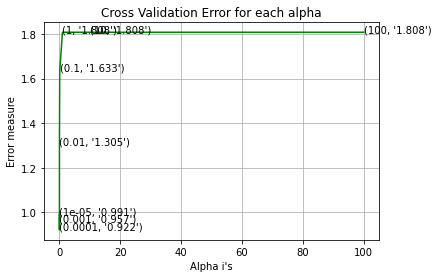

For values of best alpha =  0.0001 The train log loss is: 0.3199843962989488
For values of best alpha =  0.0001 The cross validation log loss is: 0.9215510032372161
For values of best alpha =  0.0001 The test log loss is: 1.1210716543262578


In [128]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    #clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_tf_idf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tf_idf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tf_idf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier( class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)

predict_y_tr = sig_clf.predict_proba(train_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

Log loss : 0.9215510032372161
Number of mis-classified points : 0.30639097744360905
-------------------- Confusion matrix --------------------


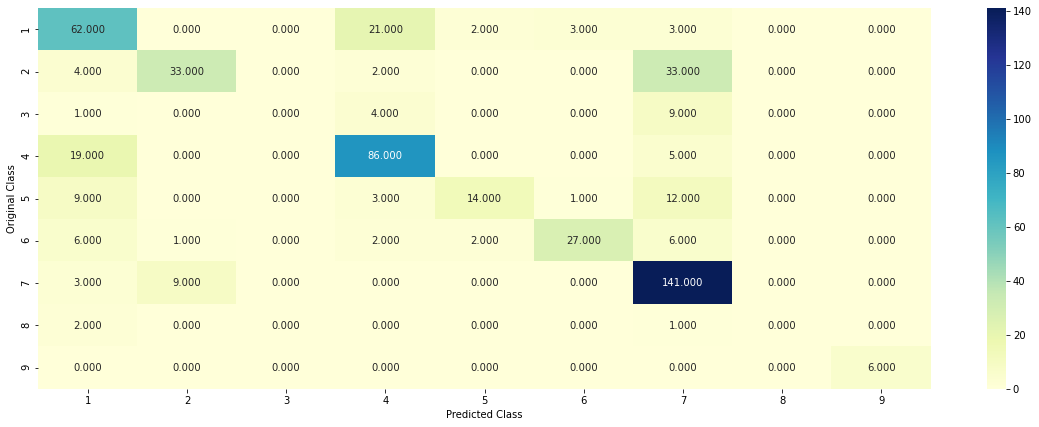

-------------------- Precision matrix (Columm Sum=1) --------------------


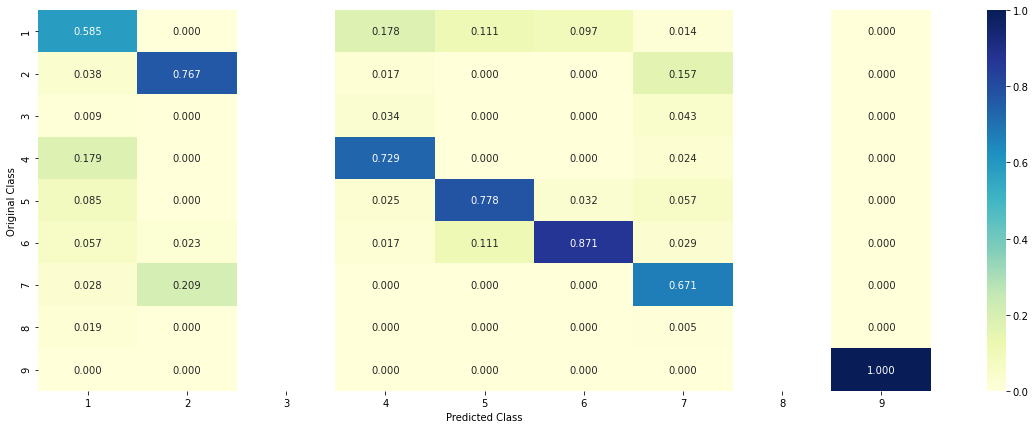

-------------------- Recall matrix (Row sum=1) --------------------


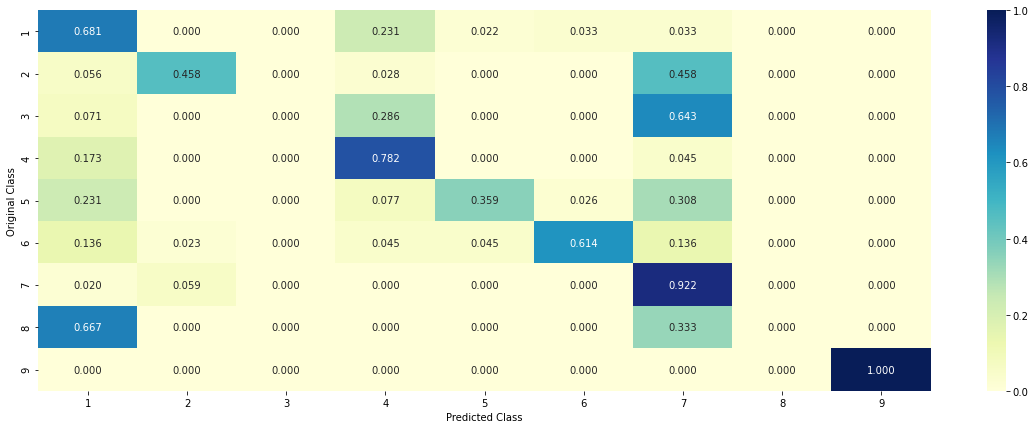

In [129]:

# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier( class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
predict_and_plot_confusion_matrix(train_x_tf_idf, train_y,cv_x_tf_idf,cv_y, clf)


In [130]:
clf.fit(train_x_tf_idf,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tf_idf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tf_idf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.8504 0.0444 0.0021 0.0875 0.0063 0.0025 0.0018 0.0041 0.0009]]
Actual Class : 1
--------------------------------------------------
201 Text feature [100] present in test data point [True]
450 Text feature [120436] present in test data point [True]
452 Text feature [1039] present in test data point [True]
Out of the top  500  features  3 are present in query point


In [131]:
predict_y_tst_class = sig_clf.predict(test_x_tf_idf)
results.add_row(["Linear SVM Classifier",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15),log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15),misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+------------------------------+---------------------+--------------------+--------------------+------------------------+
|          Model name          |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+------------------------------+---------------------+--------------------+--------------------+------------------------+
|   Naive Bayes with TF-IDF    | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
| Log Reg with class balancing | 0.40980182935868736 | 0.8719543280838714 | 1.0870427816683923 |  0.35639097744360904   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
|    Linear SVM Classifier     |  0.3199843962989488 | 0.9215510032372161 | 1.1210716543262578 |   0.3639097744360902   |
+-----------------------

### Random Forest Classifier

In [134]:

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-2)
        clf.fit(train_x_tf_idf, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_tf_idf, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_tf_idf)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)

predict_y_tr = sig_clf.predict_proba(train_x_tf_idf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_tf_idf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_tf_idf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.1803103531855026
for n_estimators = 100 and max depth =  10
Log Loss : 1.223149681797941
for n_estimators = 200 and max depth =  5
Log Loss : 1.157178583069046
for n_estimators = 200 and max depth =  10
Log Loss : 1.2107325578266912
for n_estimators = 500 and max depth =  5
Log Loss : 1.157813206720445
for n_estimators = 500 and max depth =  10
Log Loss : 1.205400788899762
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1546465435999433
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2052359008763427
for n_estimators = 2000 and max depth =  5
Log Loss : 1.155126516117848
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2043644400920803
For values of best estimator =  1000 The train log loss is: 0.8474549787553488
For values of best estimator =  1000 The cross validation log loss is: 1.1546465435999431
For values of best estimator =  1000 The test log loss is: 1.2224393928188104


Log loss : 1.1546465435999431
Number of mis-classified points : 0.3966165413533835
-------------------- Confusion matrix --------------------


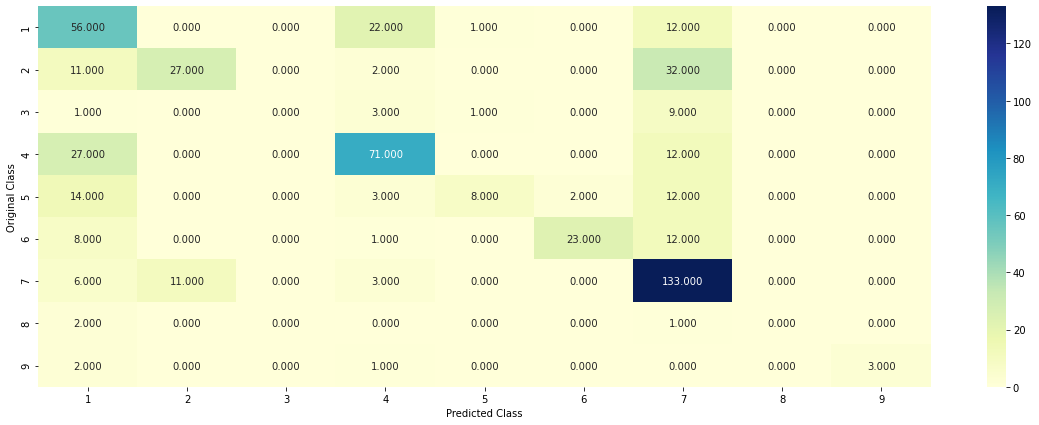

-------------------- Precision matrix (Columm Sum=1) --------------------


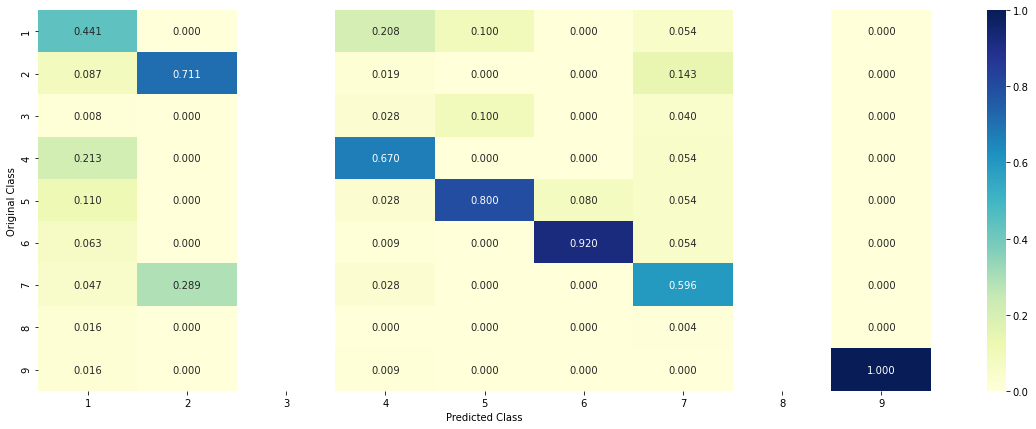

-------------------- Recall matrix (Row sum=1) --------------------


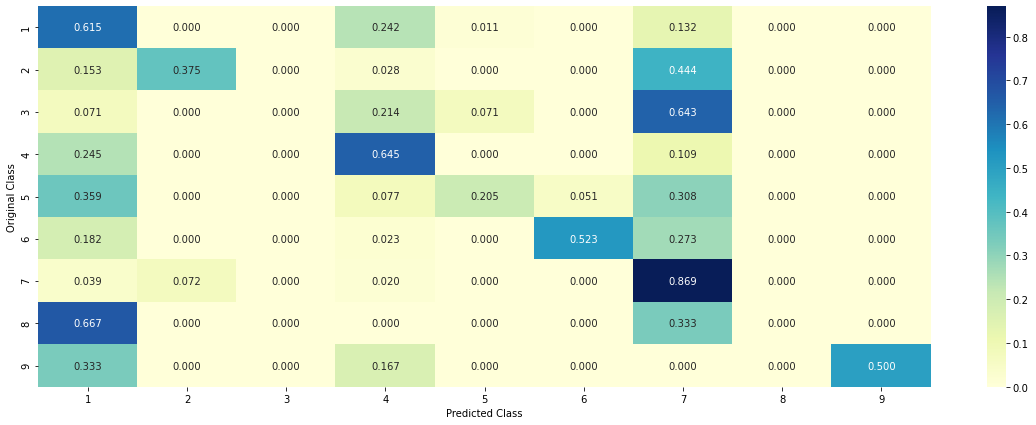

In [135]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_tf_idf, train_y,cv_x_tf_idf,cv_y, clf)

In [136]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tf_idf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tf_idf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5645 0.0277 0.0122 0.213  0.0672 0.0603 0.0294 0.0105 0.0151]]
Actual Class : 1
--------------------------------------------------
36 Text feature [1277] present in test data point [True]
70 Text feature [126] present in test data point [True]
Out of the top  100  features  2 are present in query point


In [137]:
predict_y_tst_class = sig_clf.predict(test_x_tf_idf)
results.add_row(["Random Forest Classifier",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15),log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15),misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+------------------------------+---------------------+--------------------+--------------------+------------------------+
|          Model name          |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+------------------------------+---------------------+--------------------+--------------------+------------------------+
|   Naive Bayes with TF-IDF    | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
| Log Reg with class balancing | 0.40980182935868736 | 0.8719543280838714 | 1.0870427816683923 |  0.35639097744360904   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
|    Linear SVM Classifier     |  0.3199843962989488 | 0.9215510032372161 | 1.1210716543262578 |   0.3639097744360902   |
|   Random Forest Classi

### Stacking the models

In [146]:
clf1 = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_tf_idf, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_tf_idf, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_tf_idf, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_tf_idf, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_tf_idf))))
sig_clf2.fit(train_x_tf_idf, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_tf_idf))))
sig_clf3.fit(train_x_tf_idf, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_tf_idf))))
print("-"*50)

alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha=0
best_error=999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_tf_idf, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_tf_idf))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_tf_idf))
    if best_error > log_error:
        best_error = log_error
        best_alpha = i

Logistic Regression :  Log Loss: 0.87
Support vector machines : Log Loss: 0.96
Naive Bayes : Log Loss: 1.11
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.808
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.641
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.160
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.052
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.280
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.617


Log loss (train) on the stacking classifier : 0.2090723331517284
Log loss (CV) on the stacking classifier : 1.0524593135356124
Log loss (test) on the stacking classifier : 1.2711113682658968
Number of missclassified point : 0.3819548872180451
-------------------- Confusion matrix --------------------


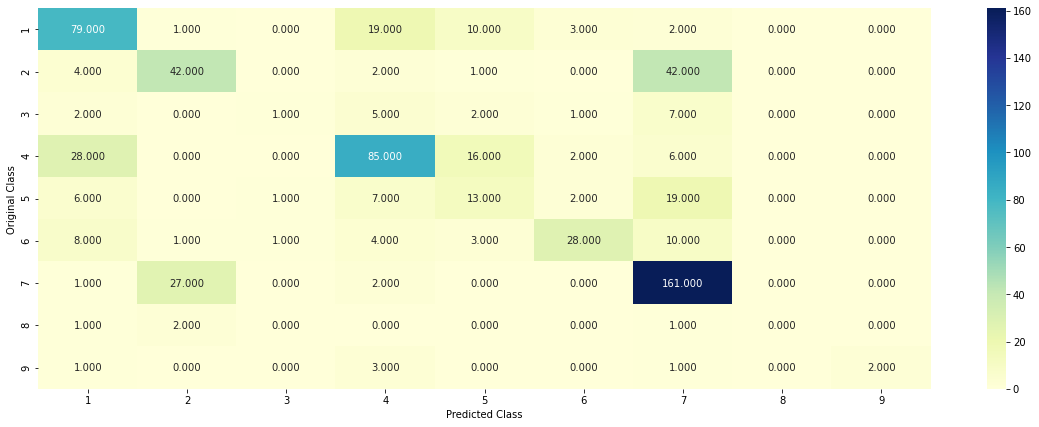

-------------------- Precision matrix (Columm Sum=1) --------------------


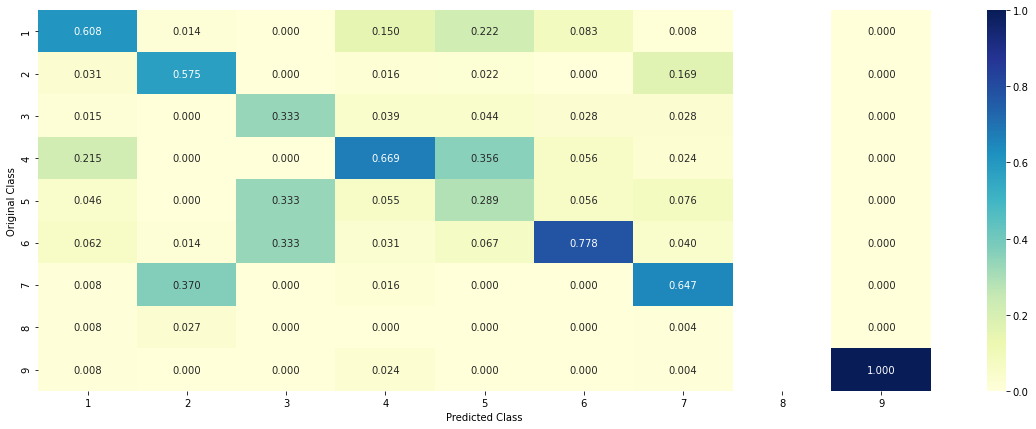

-------------------- Recall matrix (Row sum=1) --------------------


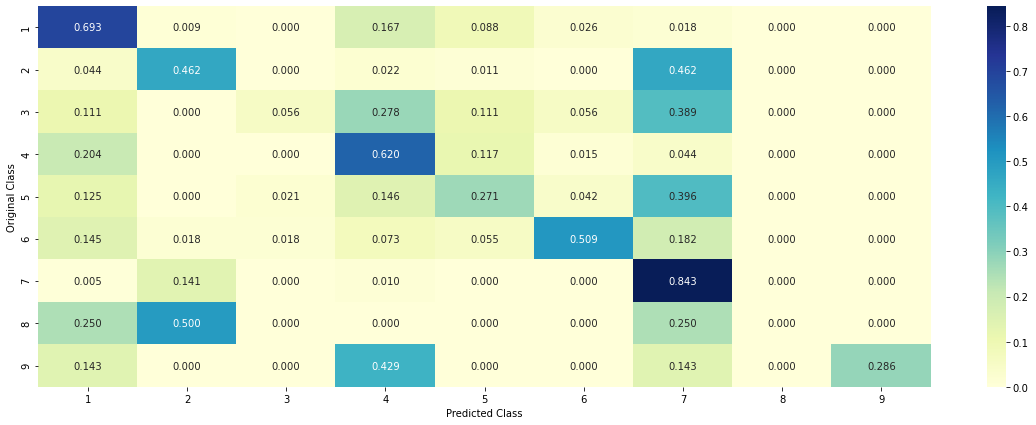

In [147]:
lr = LogisticRegression(C=best_alpha)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_tf_idf, train_y)

log_error_tr = log_loss(train_y, sclf.predict_proba(train_x_tf_idf))
print("Log loss (train) on the stacking classifier :",log_error_tr)

log_error_cv = log_loss(cv_y, sclf.predict_proba(cv_x_tf_idf))
print("Log loss (CV) on the stacking classifier :",log_error_cv)

log_error_tst = log_loss(test_y, sclf.predict_proba(test_x_tf_idf))
print("Log loss (test) on the stacking classifier :",log_error_tst)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_tf_idf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_tf_idf))

In [148]:
predict_y_tst_class = sclf.predict(test_x_tf_idf)
results.add_row(["Stacking the models",log_error_tr,log_error_cv,log_error_tst,misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+------------------------------+---------------------+--------------------+--------------------+------------------------+
|          Model name          |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+------------------------------+---------------------+--------------------+--------------------+------------------------+
|   Naive Bayes with TF-IDF    | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
| Log Reg with class balancing | 0.40980182935868736 | 0.8719543280838714 | 1.0870427816683923 |  0.35639097744360904   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
|    Linear SVM Classifier     |  0.3199843962989488 | 0.9215510032372161 | 1.1210716543262578 |   0.3639097744360902   |
|   Random Forest Classi

### Maximum Voting Classifier

Log loss (train) on the VotingClassifier : 0.44942948806592287
Log loss (CV) on the VotingClassifier : 0.9322965897486101
Log loss (test) on the VotingClassifier : 1.106468761401085
Number of missclassified point : 0.3609022556390977
-------------------- Confusion matrix --------------------


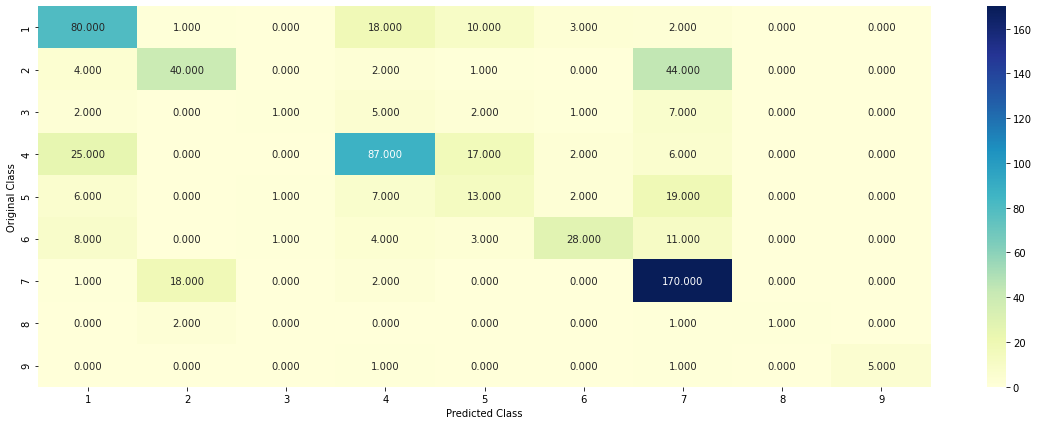

-------------------- Precision matrix (Columm Sum=1) --------------------


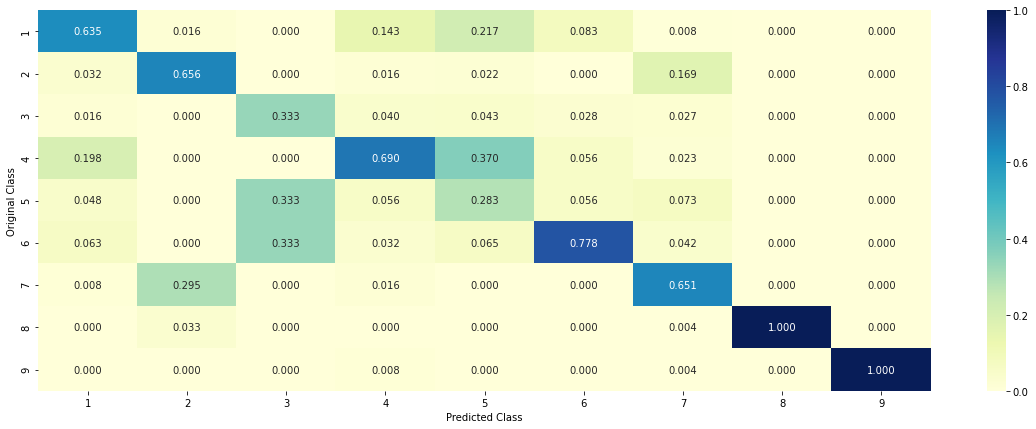

-------------------- Recall matrix (Row sum=1) --------------------


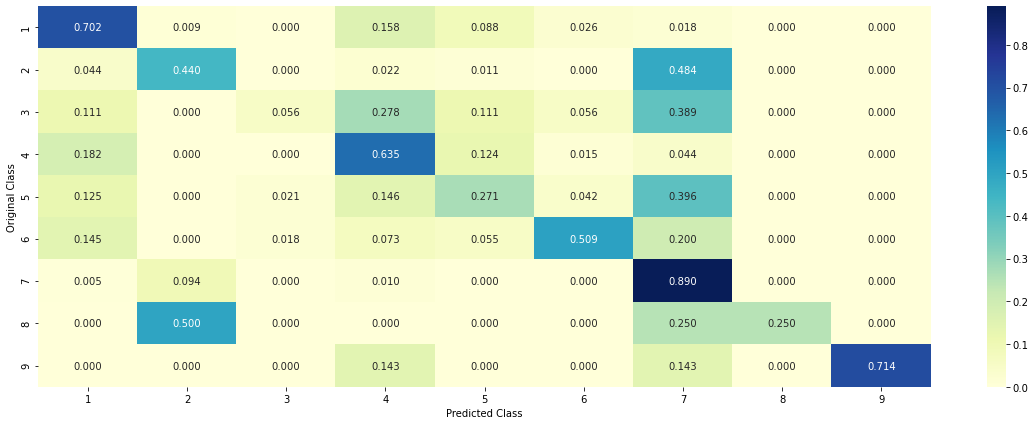

In [149]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_tf_idf, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_tf_idf)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_tf_idf)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_tf_idf)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_tf_idf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_tf_idf))

In [150]:
predict_y_tst_class = vclf.predict(test_x_tf_idf)
results.add_row(["Maximum Vote Classifier",log_loss(train_y, vclf.predict_proba(train_x_tf_idf)),log_loss(cv_y, vclf.predict_proba(cv_x_tf_idf)),log_loss(test_y, vclf.predict_proba(test_x_tf_idf)),misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+------------------------------+---------------------+--------------------+--------------------+------------------------+
|          Model name          |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+------------------------------+---------------------+--------------------+--------------------+------------------------+
|   Naive Bayes with TF-IDF    | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
| Log Reg with class balancing | 0.40980182935868736 | 0.8719543280838714 | 1.0870427816683923 |  0.35639097744360904   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
| Log Reg w/o class balancing  |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
|    Linear SVM Classifier     |  0.3199843962989488 | 0.9215510032372161 | 1.1210716543262578 |   0.3639097744360902   |
|   Random Forest Classi

### Bigrams and Logistic Regression

In [151]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,2))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 764431


In [152]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# We normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [153]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


for alpha = 0.0001
Log Loss : 1.4127204232377226
for alpha = 0.001
Log Loss : 1.117826476286694
for alpha = 0.01
Log Loss : 1.09385045509501
for alpha = 0.1
Log Loss : 1.1305424955257133
for alpha = 1
Log Loss : 1.2244550720511562
for alpha = 10
Log Loss : 1.3150393609218372
for alpha = 100
Log Loss : 1.3331965912738697


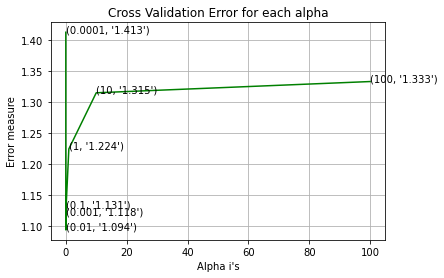

For values of best alpha =  0.01 The train log loss is: 0.6684245522644191
For values of best alpha =  0.01 The cross validation log loss is: 1.09385045509501
For values of best alpha =  0.01 The test log loss is: 1.223721639666614


In [156]:
alpha = [10 ** x for x in range(-4, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42,n_jobs=-2)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y_tr = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

In [160]:

predict_y_tr = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.01 The train log loss is: 0.6684245522644191
For values of best alpha =  0.01 The cross validation log loss is: 1.09385045509501
For values of best alpha =  0.01 The test log loss is: 1.223721639666614


In [161]:
predict_y_tst_class = clf.predict(test_x_onehotCoding)
results.add_row(["Logistic Regression with bigrams",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15),log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15),misclassication_rate(y_test,predict_y_tst_class) ])
print(results)

+----------------------------------+---------------------+--------------------+--------------------+------------------------+
|            Model name            |     Train error     |      CV Error      |     Test Error     | % misclassified points |
+----------------------------------+---------------------+--------------------+--------------------+------------------------+
|     Naive Bayes with TF-IDF      | 0.44509205110382793 | 1.2486556839062133 | 1.1067521978564576 |   0.4030075187969925   |
|   Log Reg with class balancing   | 0.40980182935868736 | 0.8719543280838714 | 1.0870427816683923 |  0.35639097744360904   |
|   Log Reg w/o class balancing    |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
|   Log Reg w/o class balancing    |  0.3844745504166274 | 0.906292078879508  | 1.1059372496421178 |   0.3639097744360902   |
|      Linear SVM Classifier       |  0.3199843962989488 | 0.9215510032372161 | 1.1210716543262578 |   0.3639097744360

### Test the flow

In [162]:
# Building a tf-idf with all the words that occured minimum 3 times in train data
#Applying to test text feature
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(min_df=9)
train_text_feature_tf_idf = tf_idf_vectorizer.fit_transform(train_df['TEXT'])
train_text_feature_tf_idf = normalize(train_text_feature_tf_idf,axis=0)


# getting all the feature names (words)
train_text_features = tf_idf_vectorizer.get_feature_names()

# train_text_feature_tf_idf.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_tf_idf.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

#Applying to test text feature
# we use the same vectorizer that was trained on train data
test_text_feature_tf_idf = tf_idf_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_tf_idf = normalize(test_text_feature_tf_idf, axis=0)

#Applying to CV text feature
# we use the same vectorizer that was trained on tr ain data
cv_text_feature_tf_idf = tf_idf_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_tf_idf = normalize(cv_text_feature_tf_idf, axis=0)


# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

# For adding multiple CSR matrices, need to do a hstack and then convert them to CSR using tocsr()
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_tf_idf = hstack((train_gene_var_onehotCoding, train_text_feature_tf_idf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tf_idf = hstack((test_gene_var_onehotCoding, test_text_feature_tf_idf)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_tf_idf = hstack((cv_gene_var_onehotCoding, cv_text_feature_tf_idf)).tocsr()
cv_y = np.array(list(cv_df['Class']))



Total number of unique words in train data : 26810


for alpha = 5e-05
Log Loss : 1.0069308117586266
for alpha = 0.0001
Log Loss : 0.9796262343883662
for alpha = 0.00015000000000000001
Log Loss : 0.963567834496853
for alpha = 0.0002
Log Loss : 0.9571576879774069
for alpha = 0.00025
Log Loss : 0.9530532416734655
for alpha = 0.00030000000000000003
Log Loss : 0.9485845572387692
for alpha = 0.00035
Log Loss : 0.9502688891764949
for alpha = 0.0004
Log Loss : 0.9497500559636552
for alpha = 0.00045000000000000004
Log Loss : 0.9499897675642957
for alpha = 0.0005
Log Loss : 0.9519707254150214


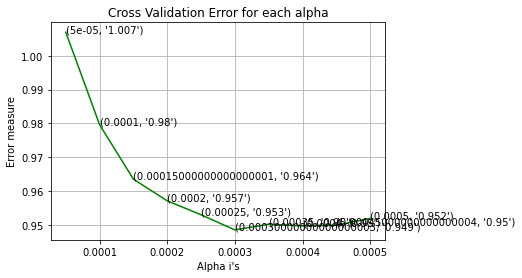

For values of best alpha =  0.00030000000000000003 The train log loss is: 0.4389467538247404
For values of best alpha =  0.00030000000000000003 The cross validation log loss is: 0.9485845572387692
For values of best alpha =  0.00030000000000000003 The test log loss is: 1.061277911664994


In [165]:
alpha = [0.00005*(1+i) for i in range(10)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log',learning_rate='optimal', random_state=42)
    clf.fit(train_x_tf_idf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tf_idf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tf_idf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot((alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', learning_rate='optimal', random_state=42)
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)

predict_y_tr = sig_clf.predict_proba(train_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

In [166]:

best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', learning_rate='optimal', random_state=42)
clf.fit(train_x_tf_idf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tf_idf, train_y)

predict_y_tr = sig_clf.predict_proba(train_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_tr, labels=clf.classes_, eps=1e-15))
predict_y_cv = sig_clf.predict_proba(cv_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
predict_y_tst = sig_clf.predict_proba(test_x_tf_idf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_tst, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.00030000000000000003 The train log loss is: 0.4389467538247404
For values of best alpha =  0.00030000000000000003 The cross validation log loss is: 0.9485845572387692
For values of best alpha =  0.00030000000000000003 The test log loss is: 1.061277911664994
